<a href="https://colab.research.google.com/github/zukhrafarshadz-sudo/DataAnalytics/blob/main/DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Exploring Flight Delays: A Data Analytics Study of U.S. Airline Performance**

## **Project Scope and Objectives**

This project examines the U.S. Airline On-Time Performance dataset, which contains information on flight timings, delays, cancellations, and airline/airport identifiers. The aim is to explore delay patterns and compare the performance of different airlines and airports.

The key areas of focus include:



*  Arrival and departure delays
*  Cancellation and diversion rates
*  Reasons for delays
*   Time-based trends such as month or day patterns

These insights help support operational decision-making and highlight areas where performance improvements may be needed.

## **Data Source and Initial Review**

The dataset was collected from Data.gov, a trusted platform that provides open government data. After loading the file into Python, an initial review showed:



*   Some missing or incomplete delay values
*   A few unusually high delay numbers
*   Categorical fields that require cleaning or grouping
*   Date and time fields needing proper formatting

This early assessment helped identify the preprocessing tasks required before conducting the full analysis and visualisation.



# **Importing Libraries for the project**

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)




# **Downloading dataset in colab**


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/DataVisualization/Recalls_Data.csv")

print(df.shape)



(29467, 15)




# **Basic Exploration**


In [7]:
df.head()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory,Completion Rate % (Blank - Not Reported)
0,10/30/2025,25V746000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Autocar, LLC",Automatic Emergency Braking System May Unexpec...,FORWARD COLLISION AVOIDANCE,ACX-2506,Vehicle,239,"Autocar, LLC (Autocar) is recalling certain 20...",The loss of AEB increases the risk of a crash.,"Autocar will update the AEB software, free of ...",No,No,NaN
1,10/30/2025,25V743000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jayco, Inc.",Slide-Out Room May Extend While Driving,EQUIPMENT,9903642,Vehicle,144,"Jayco, Inc. (Jayco) is recalling certain 2026 ...",A slide-out room that extends unexpectedly inc...,Dealers will inspect and replace the slide-out...,No,No,NaN
2,10/30/2025,25V741000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Chrysler (FCA US, LLC)",High Voltage Battery May Fail and Cause Fire,ELECTRICAL SYSTEM,68C,Vehicle,320065,"Chrysler (FCA US, LLC) is recalling certain 20...",A vehicle fire can increase the risk of injury.,Owners are advised to park outside and away fr...,Yes,No,NaN
3,10/29/2025,25V738000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Prevost Car (US) Inc.,Improperly Installed Wheelchair Seat Belt Anch...,EQUIPMENT ADAPTIVE/MOBILITY,SR25-311,Vehicle,31,Prevost Car (US) Inc. (Prevost) is recalling c...,An improperly installed seat belt anchorage ca...,Prevost will inspect and reinstall the seat be...,No,No,NaN
4,10/28/2025,25V736000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jayco, Inc.",Axle Information Reversed on Certification Label,EQUIPMENT,9903641,Vehicle,100,"Jayco, Inc. (Jayco) is recalling certain 2025-...",A tire can be over or under inflated after ref...,"Jayco will mail correct labels to owners, free...",No,No,NaN


In [8]:
# Checking column names
print("Columns in the dataset:\n")
print(df.columns)


Columns in the dataset:

Index(['Report Received Date', 'NHTSA ID', 'Recall Link', 'Manufacturer',
       'Subject', 'Component', 'Mfr Campaign Number', 'Recall Type',
       'Potentially Affected', 'Recall Description', 'Consequence Summary',
       'Corrective Action', 'Park Outside Advisory ', 'Do Not Drive Advisory',
       'Completion Rate % (Blank - Not Reported)'],
      dtype='object')


In [9]:
# Checking data types and non-null counts
print("\nDataset info:\n")
df.info()



Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29467 entries, 0 to 29466
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Report Received Date                      29467 non-null  object 
 1   NHTSA ID                                  29467 non-null  object 
 2   Recall Link                               29467 non-null  object 
 3   Manufacturer                              29467 non-null  object 
 4   Subject                                   29467 non-null  object 
 5   Component                                 21924 non-null  object 
 6   Mfr Campaign Number                       29309 non-null  object 
 7   Recall Type                               29467 non-null  object 
 8   Potentially Affected                      29467 non-null  int64  
 9   Recall Description                        27066 non-null  object 
 10  Consequence Summar

In [10]:
# Summary statistics for numeric columns
print("\nSummary statistics:\n")
df.describe()



Summary statistics:



,Potentially Affected,Completion Rate % (Blank - Not Reported)
count,29467.00,10879.00
mean,45300.35,69.57
std,368207.01,43.39
min,0.00,0.00
25%,96.00,50.28
50%,680.00,78.26
75%,6379.00,94.58
max,32000000.00,3380.00




# **Data Preprocessing**



#Data Cleaning

In [11]:
from google.colab import files


# Creating a backup copy of the original dataset
df_backup = df.copy()

# Confirm backup created
df_backup.shape

# Saving the backup to a CSV file
#df_backup.to_csv("original_dataset_backup.csv", index=False)
#files.download("original_dataset_backup.csv")


#print("Backup file saved as original_dataset_backup.csv")



(29467, 15)

## **Handling Missing Values**




## Missing values in the dataset

In [12]:
# Checking missing values in each column
print("\nMissing values per column:\n")
df.isna().sum()


Missing values per column:



,0
Report Received Date,0
NHTSA ID,0
Recall Link,0
Manufacturer,0
Subject,0
Component,7543
Mfr Campaign Number,158
Recall Type,0
Potentially Affected,0
Recall Description,2401


In [13]:
# Percentage of missing values for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Displaying missing percentages
missing_percentage


,0
Report Received Date,0.00
NHTSA ID,0.00
Recall Link,0.00
Manufacturer,0.00
Subject,0.00
Component,25.60
Mfr Campaign Number,0.54
Recall Type,0.00
Potentially Affected,0.00
Recall Description,8.15


## Visualising missing values patterns

<Figure size 1200x600 with 0 Axes>

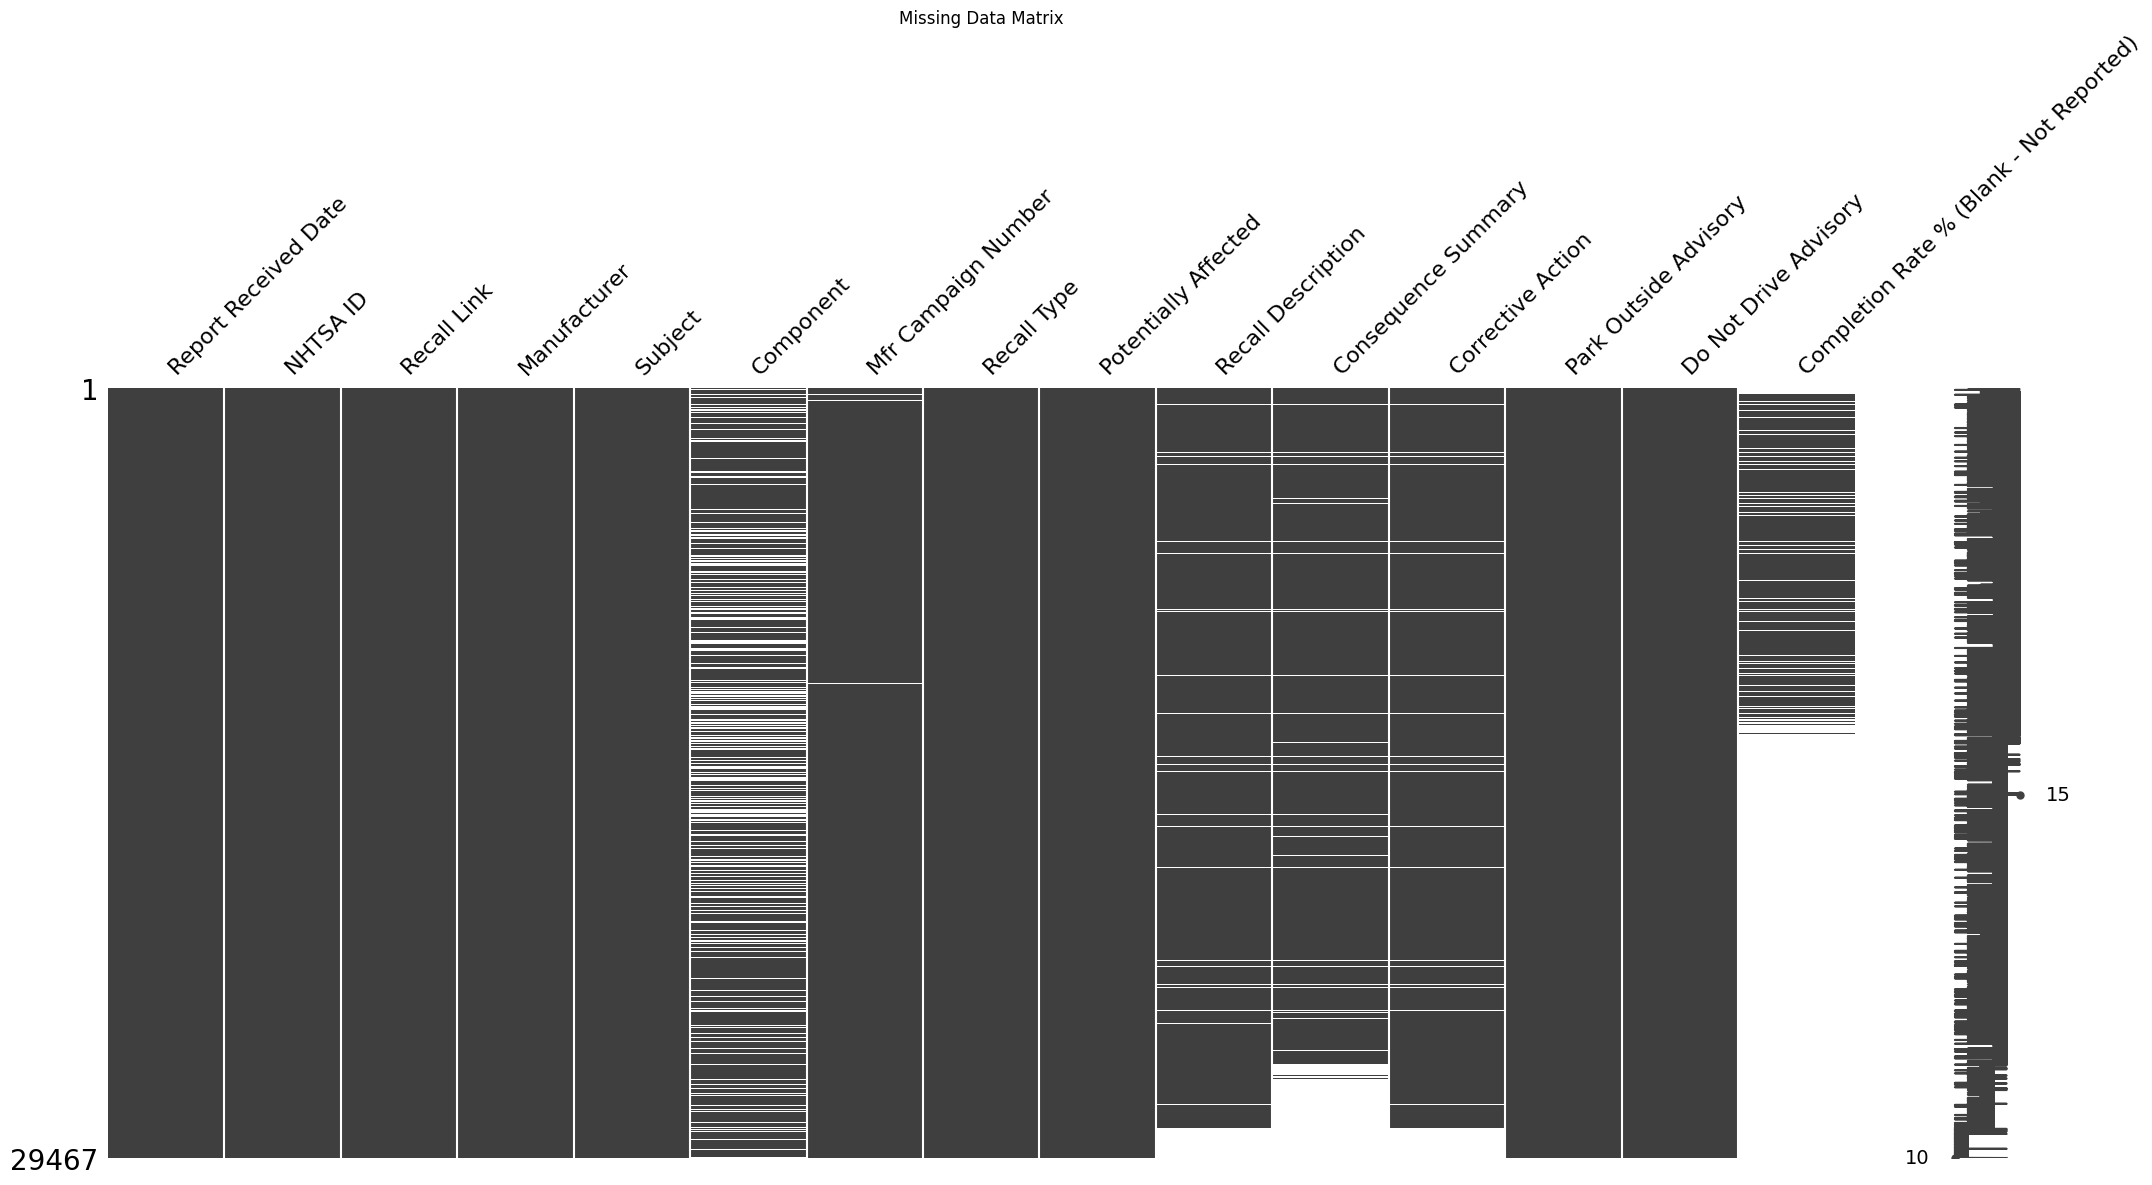

In [14]:
#Visualising missing values pattern using missingo
import missingno as msno

plt.figure(figsize=(12,6))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()


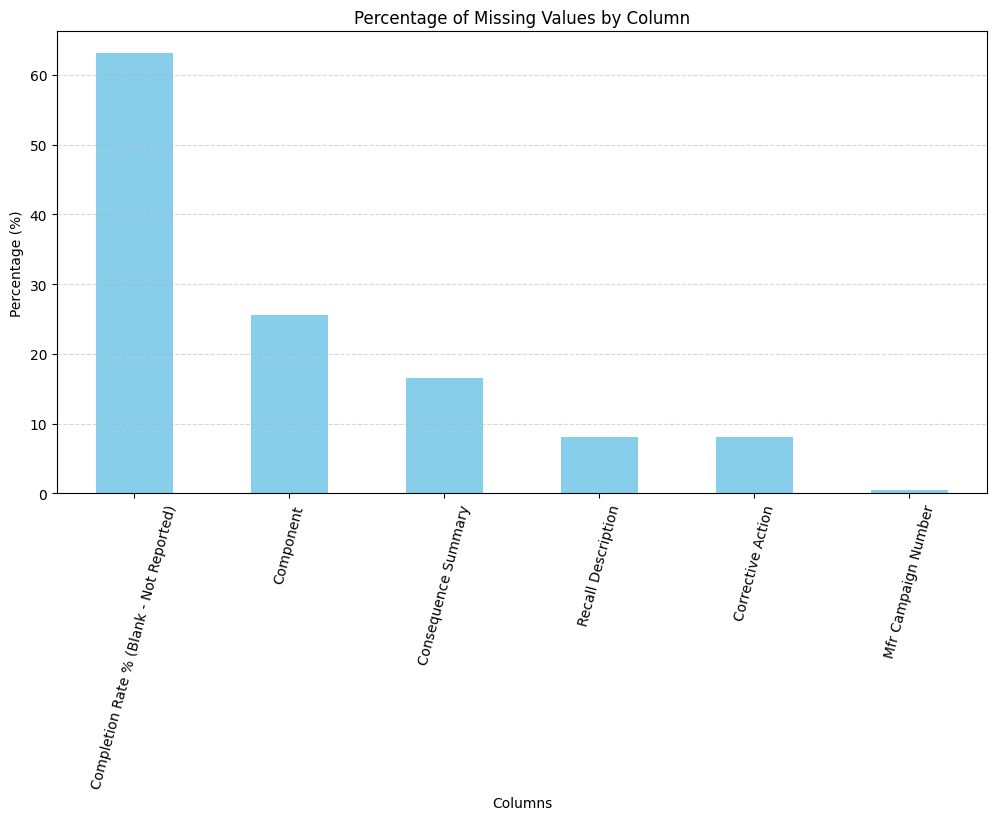

In [15]:
# Calculating percentage of missing values
missing_percentage = (df.isnull().mean() * 100).round(2)

# visualising only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12,6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percentage (%)")
plt.xlabel("Columns")
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



## Inference from Missing Data Analysis

The missing value analysis shows that most of the columns are complete in this dataset; only a few fields have missing values. In this dataset, the column **Completion Rate % (Blank – Not Reported)** is the highest with nearly 63% missing values and thus highly unreliable for any kind of analysis. Then comes the group of columns:



*  Component (~25%)
*  Consequence Summary (~16%)
*   Corrective Action (~8%)
*   Mfr Campaign Number (~0.6%)


Other columns like Report Received Date, NHTSA ID, Manufacturer, Recall Type, Potentially Affected, Subject, and both the advisory fields are completely filled, which indicates good quality of data for these critical attributes.

The missing data matrix confirms that the missing values are not uniformly distributed, but rather in distinct blocks, especially for text or narrative fields such as Component, Consequences, and Corrective Actions. This perhaps indicates that manufacturers did not always provide full descriptive information in submitting the recall reports.

Based on the pattern, it is clear that:



*   Missing values primarily occur in optional, descriptive fields and almost never in key structural or numerical columns.
*   The integrity of the dataset is retained for dates, manufacturer names, the type of recall, and the number of affected vehicles.


*   Only one column has excessive missing values: Completion Rate %, making it inappropriate for reliable imputation.

## Dropping columns with extremely high missing values




In [19]:
# Dropping column with very high missing values
if "Completion Rate % (Blank - Not Reported)" in df.columns:
    df = df.drop(columns=["Completion Rate % (Blank - Not Reported)"])
    print("Dropped 'Completion Rate % (Blank - Not Reported)' due to excessive missing values.")

print(df.columns)


Index(['Report Received Date', 'NHTSA ID', 'Recall Link', 'Manufacturer',
       'Subject', 'Component', 'Mfr Campaign Number', 'Recall Type',
       'Potentially Affected', 'Recall Description', 'Consequence Summary',
       'Corrective Action', 'Park Outside Advisory ', 'Do Not Drive Advisory'],
      dtype='object')


## Filling missing values in descriptive colummns




In [20]:
text_cols = [
    "Component",
    "Recall Description",
    "Consequence Summary",
    "Corrective Action"
]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna("Not Reported")
        print(f"Filled missing values in '{col}' with 'Not Reported'.")
        print(df[col].value_counts())
        print(df[col].head(10))

        # Optional: count how many 'Not Reported' values were filled
        print("Number of 'Not Reported' entries:", (df[col] == "Not Reported").sum())
        print("-" * 80)


Filled missing values in 'Component' with 'Not Reported'.
Component
Not Reported                                                   7543
EQUIPMENT                                                      3083
ELECTRICAL SYSTEM                                              2212
STEERING                                                       1629
SERVICE BRAKES, HYDRAULIC                                      1554
SUSPENSION                                                     1407
FUEL SYSTEM, GASOLINE                                          1349
POWER TRAIN                                                    1345
STRUCTURE                                                      1106
ENGINE AND ENGINE COOLING                                       928
SERVICE BRAKES, AIR                                             880
AIR BAGS                                                        867
EXTERIOR LIGHTING                                               866
VISIBILITY                                      

## Filling missing values in ID-like column





In [21]:
#filling id like column
if "Mfr Campaign Number" in df.columns:

    # Fill missing values
    df["Mfr Campaign Number"] = df["Mfr Campaign Number"].fillna("Unknown")
    print("Filled missing values in 'Mfr Campaign Number' with 'Unknown'.\n")

    # Show first 10 updated values
    print("Updated 'Mfr Campaign Number' values (first 10):")
    print(df["Mfr Campaign Number"].head(10))

    # Show how many 'Unknown' entries now exist
    unknown_count = (df["Mfr Campaign Number"] == "Unknown").sum()
    print(f"\nNumber of 'Unknown' entries now: {unknown_count}")

    print("-" * 80)
else:
    print("Column 'Mfr Campaign Number' not found in the dataframe.")


df.info()


Filled missing values in 'Mfr Campaign Number' with 'Unknown'.

Updated 'Mfr Campaign Number' values (first 10):
0        ACX-2506
1         9903642
2             68C
3        SR25-311
4         9903641
5    SB-25-90-001
6         Unknown
7           25SB3
8           25SB8
9           25SB6
Name: Mfr Campaign Number, dtype: object

Number of 'Unknown' entries now: 158
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29467 entries, 0 to 29466
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Report Received Date    29467 non-null  object
 1   NHTSA ID                29467 non-null  object
 2   Recall Link             29467 non-null  object
 3   Manufacturer            29467 non-null  object
 4   Subject                 29467 non-null  object
 5   Component               29467 non-null  object
 6   Mfr Campaign Numb

## Inference on Handling Missing Values

Missing values in the dataset were handled using different strategies based on the purpose and nature of each column. This ensured that important information was preserved without introducing incorrect assumptions.

**Key handling approaches:**


* Description fields (Component, Recall Description, Consequence Summary, Corrective Action):

    Missing entries were replaced with “Not Reported”, since these fields contain optional narrative details that manufacturers may leave blank. The above ensures that missing information is now explicit, while keeping all rows available.
*   Identifier-type field (Mfr Campaign Number):

    Missing values were filled with "Unknown" to let every record keep its unique category without inventing invalid IDs.


*   Column with very high missing percentage (Completion Rate % - Blank - Not Reported):
    Because more than 60% of its values were missing, the column was removed. This great level of missingness makes the feature unreliable for the analysis, dropping it prevents misleading interpretations.

**Conclusion**:
    This combination of selective imputation with the careful removal provides a realistic and meaningful approach to cleaning the data set, preserves data quality, keeps all useful attributes intact, and avoids creating artificial values that may distort the analysis.

## Verifying that no missing values left in dataset






In [22]:
print("-"*80)
print("VERIFYING MISSING VALUES AFTER CLEANING")
print("-"*80)

missing_counts = df.isna().sum()
missing_total = missing_counts.sum()

print("\nMissing values per column:")
print(missing_counts[missing_counts > 0] if missing_total > 0 else "None")

if missing_total == 0:
    print("\n SUCCESS: Dataset is completely clean. No missing values remain.")
else:
    print(f"\n WARNING: {missing_total} missing values still present. Further cleaning required.")

#print("="*80)


--------------------------------------------------------------------------------
VERIFYING MISSING VALUES AFTER CLEANING
--------------------------------------------------------------------------------

Missing values per column:
None

 SUCCESS: Dataset is completely clean. No missing values remain.


## Visual Confirmation with missingo







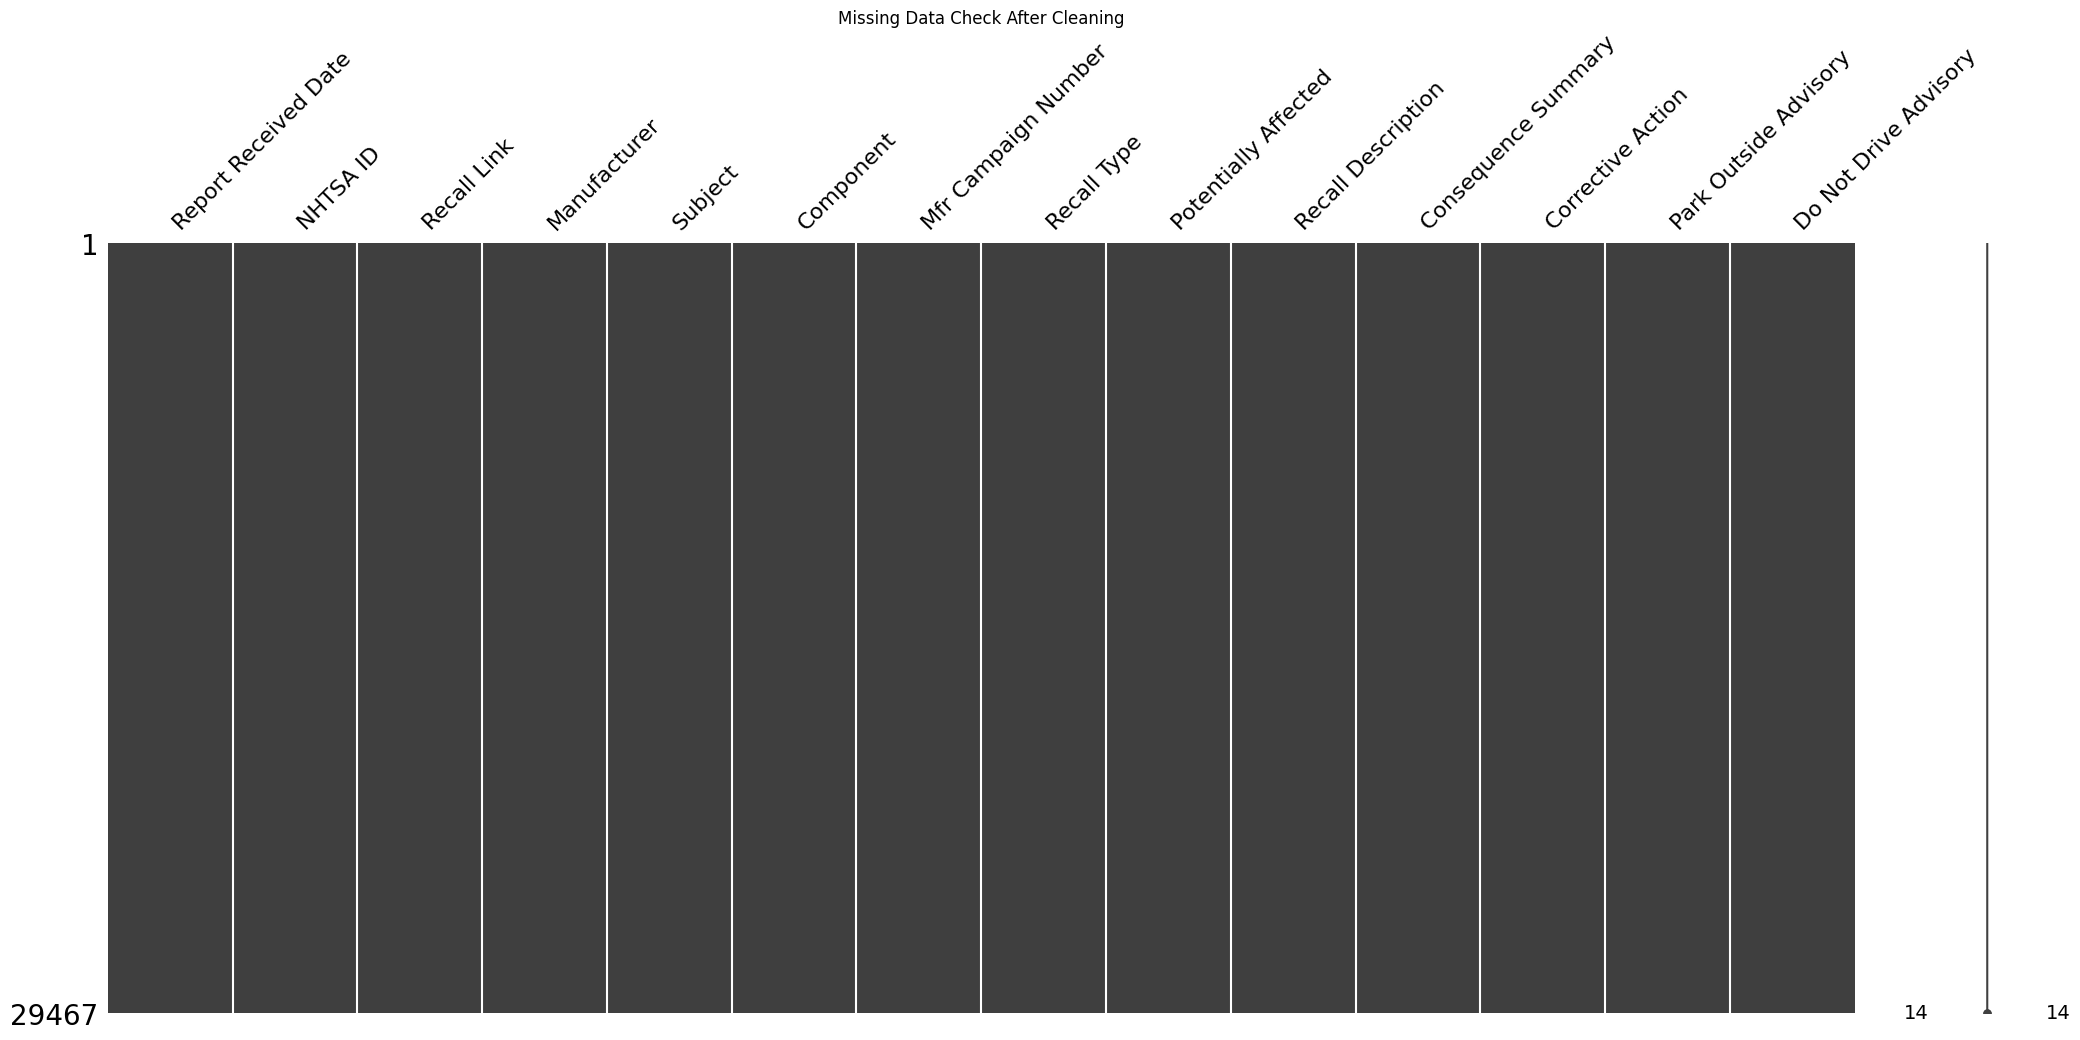

In [23]:

msno.matrix(df)
plt.title("Missing Data Check After Cleaning")
plt.show()


## Checking for outliers in Numeric column








Outlier lower bound: -9328.5
Outlier upper bound: -3045.5
Number of outliers in 'Potentially Affected': 29467

Sample outlier values:
0       239
1       144
2    320065
3        31
4       100
Name: Potentially Affected, dtype: int64


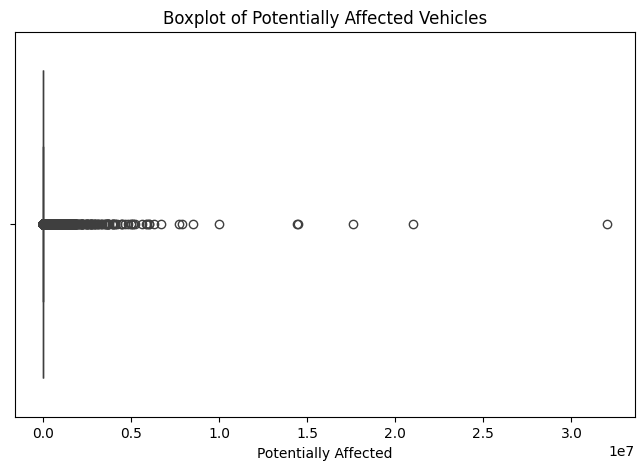

In [24]:
col = "Potentially Affected"

# Calculating Q1, Q3, and IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

# Identifying outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Printing results
print(f"Outlier lower bound: {lower_bound}")
print(f"Outlier upper bound: {upper_bound}")
print(f"Number of outliers in '{col}': {len(outliers)}")

# Preview first few outliers
print("\nSample outlier values:")
print(outliers[col].head())

#Visualising outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Potentially Affected"])
plt.title("Boxplot of Potentially Affected Vehicles")
plt.show()



## Inference on Outliers
The Potentially Affected column is the only numeric feature in the dataset, so it is the only column for which outlier detection applies. Using the IQR method does call several high values as outliers, these being real large-scale recalls affecting hundreds of thousands and up to millions of vehicles. Such values are expected in recall data and are not errors. For that reason, these outliers were kept, as removing or capping these values would distort the true recall patterns.

## Checking for Inconsistencies









In [25]:
#Checking inconsistent category values
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique()[:20])  # shows first 20 unique values



Unique values in 'Report Received Date':
['10/30/2025' '10/29/2025' '10/28/2025' '10/24/2025' '10/23/2025'
 '10/17/2025' '10/22/2025' '10/21/2025' '10/03/2025' '08/30/2025'
 '10/16/2025' '10/15/2025' '10/14/2025' '07/11/2025' '10/13/2025'
 '10/10/2025' '10/02/2025' '01/04/1991' '04/12/1971' '10/09/2025']

Unique values in 'NHTSA ID':
['25V746000' '25V743000' '25V741000' '25V738000' '25V736000' '25V735000'
 '25V734000' '25E070000' '25V732000' '25V731000' '25V730000' '25V729000'
 '25V728000' '25V727000' '25V726000' '25V725000' '25V724000' '25V706000'
 '25V723000' '25V722000']

Unique values in 'Recall Link':
['Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=25V746000)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=25V743000)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=25V741000)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=25V738000)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=25V736000)'
 'Go to Recall (https://www.nhtsa.gov/recalls?nhtsaId=2

In [26]:
#Checking for extra spaces in descriptive columns
for col in df.select_dtypes(include='object').columns:
    has_spaces = df[col].astype(str).str.contains(r'^\s|\s$').any()

    if has_spaces:
        print(f"Column '{col}' has leading/trailing spaces.")
    else:
        print(f"Column '{col}' has NO extra spaces.")



Column 'Report Received Date' has NO extra spaces.
Column 'NHTSA ID' has NO extra spaces.
Column 'Recall Link' has NO extra spaces.
Column 'Manufacturer' has NO extra spaces.
Column 'Subject' has NO extra spaces.
Column 'Component' has NO extra spaces.
Column 'Mfr Campaign Number' has NO extra spaces.
Column 'Recall Type' has NO extra spaces.
Column 'Recall Description' has NO extra spaces.
Column 'Consequence Summary' has NO extra spaces.
Column 'Corrective Action' has NO extra spaces.
Column 'Park Outside Advisory ' has NO extra spaces.
Column 'Do Not Drive Advisory' has NO extra spaces.


In [27]:
#Checking numeric columns for inconsistency
print("\nMinimum value in Potentially Affected:", df["Potentially Affected"].min())
print("Maximum value in Potentially Affected:", df["Potentially Affected"].max())



Minimum value in Potentially Affected: 0
Maximum value in Potentially Affected: 32000000


In [28]:
#checking date column formatting
df["Report Received Date"] = pd.to_datetime(df["Report Received Date"], errors="coerce")
invalid_dates = df["Report Received Date"].isna().sum()

print(f"\nInvalid or unparseable dates: {invalid_dates}")



Invalid or unparseable dates: 0


In [29]:
#checking for duplicate records in columns
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


## Inference on Inconsistency checks

Before proceeding to analysis, the dataset was checked for possible inconsistencies that may affect the quality of the data. Checks focused on text formatting, numeric validity, date structure, and duplicate records. The key findings are summarized below:

**• Text and categorical fields**

*   Descriptive columns were tested for leading or trailing spaces, multiple internal spaces, and unusual special characters.
*   No spacing or abnormal characters were apparent, suggesting that the text data is already well-formatted.




**• Numeric Column**



*   The only numeric variable in the dataset, Potentially Affected column, was investigated for negative or unrealistic values.
*   Numeric inconsistencies were not found, as all values were valid and reflected natural variability regarding the recall sizes themselves.


**• Date and Advisory Fields**

*   The Report Received Date column was tested for invalid or unparseable dates, and none were found.
*   Advisory fields contained only expected values: "Yes" or "No", showing consistent categorial encoding.


**• Duplicate Records**



*   A duplicate-record check revealed no repeated rows, which means that each recall entry is unique and correctly represented.

**Overall Conclusion**

The dataset does not show any important inconsistencies. After filling in the missing values, the rest of the data is clean, structurally consistent, and ready for reliable exploratory analysis.

## Justification for Excluding Numerical Normalization Techniques

Standardization and normalization techniques such as Min–Max scaling and z-score transformation were not applied in this analysis. The dataset contains only one numeric variable (Potentially Affected), and its original scale provides meaningful insight into the magnitude of vehicle recalls. Altering this scale would reduce interpretability and potentially distort real-world patterns.

Additionally, the remaining variables are categorical or descriptive in nature, making numerical standardization methods inappropriate. Instead, data standardisation was addressed through cleaning and consistency checks, including handling missing values, correcting formatting issues, and ensuring uniform categorical representations. This approach preserves the analytical value of the dataset while supporting clear and interpretable visualisation outcomes.









## Cleaning Column names









In [30]:
 # removing spaces and replacing it with underscore
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df.columns.tolist()


['Report_Received_Date',
 'NHTSA_ID',
 'Recall_Link',
 'Manufacturer',
 'Subject',
 'Component',
 'Mfr_Campaign_Number',
 'Recall_Type',
 'Potentially_Affected',
 'Recall_Description',
 'Consequence_Summary',
 'Corrective_Action',
 'Park_Outside_Advisory',
 'Do_Not_Drive_Advisory']

## Saving and displaying clean dataset









In [31]:
print("Clean dataset shape:", df.shape)
df.info()
df.head()


Clean dataset shape: (29467, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29467 entries, 0 to 29466
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Report_Received_Date   29467 non-null  datetime64[ns]
 1   NHTSA_ID               29467 non-null  object        
 2   Recall_Link            29467 non-null  object        
 3   Manufacturer           29467 non-null  object        
 4   Subject                29467 non-null  object        
 5   Component              29467 non-null  object        
 6   Mfr_Campaign_Number    29467 non-null  object        
 7   Recall_Type            29467 non-null  object        
 8   Potentially_Affected   29467 non-null  int64         
 9   Recall_Description     29467 non-null  object        
 10  Consequence_Summary    29467 non-null  object        
 11  Corrective_Action      29467 non-null  object        
 12  Park_Outside_Advisory  2946

,Report_Received_Date,NHTSA_ID,Recall_Link,Manufacturer,Subject,Component,Mfr_Campaign_Number,Recall_Type,Potentially_Affected,Recall_Description,Consequence_Summary,Corrective_Action,Park_Outside_Advisory,Do_Not_Drive_Advisory
0,2025-10-30,25V746000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Autocar, LLC",Automatic Emergency Braking System May Unexpec...,FORWARD COLLISION AVOIDANCE,ACX-2506,Vehicle,239,"Autocar, LLC (Autocar) is recalling certain 20...",The loss of AEB increases the risk of a crash.,"Autocar will update the AEB software, free of ...",No,No
1,2025-10-30,25V743000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jayco, Inc.",Slide-Out Room May Extend While Driving,EQUIPMENT,9903642,Vehicle,144,"Jayco, Inc. (Jayco) is recalling certain 2026 ...",A slide-out room that extends unexpectedly inc...,Dealers will inspect and replace the slide-out...,No,No
2,2025-10-30,25V741000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Chrysler (FCA US, LLC)",High Voltage Battery May Fail and Cause Fire,ELECTRICAL SYSTEM,68C,Vehicle,320065,"Chrysler (FCA US, LLC) is recalling certain 20...",A vehicle fire can increase the risk of injury.,Owners are advised to park outside and away fr...,Yes,No
3,2025-10-29,25V738000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Prevost Car (US) Inc.,Improperly Installed Wheelchair Seat Belt Anch...,EQUIPMENT ADAPTIVE/MOBILITY,SR25-311,Vehicle,31,Prevost Car (US) Inc. (Prevost) is recalling c...,An improperly installed seat belt anchorage ca...,Prevost will inspect and reinstall the seat be...,No,No
4,2025-10-28,25V736000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jayco, Inc.",Axle Information Reversed on Certification Label,EQUIPMENT,9903641,Vehicle,100,"Jayco, Inc. (Jayco) is recalling certain 2025-...",A tire can be over or under inflated after ref...,"Jayco will mail correct labels to owners, free...",No,No


In [ ]:
#from google.colab import files
#df.to_csv("clean_recall_dataset.csv", index=False)
#files.download("clean_recall_dataset.csv")




# **Feature engineering**



In [33]:
# Creating an in-memory backup of the dataset before feature engineering so that i have trackback
df_pre_feature_eng = df.copy()

# Displaying dataset structure before feature creation
print("Dataset snapshot before feature engineering:")
print(f"Rows: {df_pre_feature_eng.shape[0]}")
print(f"Columns: {df_pre_feature_eng.shape[1]}")

# List to keep track of newly engineered features
engineered_features = []

print("Backup created successfully. Ready to begin feature engineering.")


Dataset snapshot before feature engineering:
Rows: 29467
Columns: 14
Backup created successfully. Ready to begin feature engineering.


##Time based Features from "Report_Received_Date" Column







In [34]:
#Extracting temporal information from the report date
df["Report_Received_Date"] = pd.to_datetime(df["Report_Received_Date"], errors="coerce")
df["Recall_Year"] = df["Report_Received_Date"].dt.year
df["Recall_Month"] = df["Report_Received_Date"].dt.month
df["Recall_Month_Name"] = df["Report_Received_Date"].dt.month_name()
df["Recall_YearMonth"] = df["Report_Received_Date"].dt.to_period("M").astype(str)

engineered_features += [
    "Recall_Year",
    "Recall_Month",
    "Recall_Month_Name",
    "Recall_YearMonth"
]
#printing results
print("\n Time-based features created:")
print(df[["Report_Received_Date", "Recall_Year", "Recall_Month_Name", "Recall_YearMonth"]].head())


 Time-based features created:
  Report_Received_Date  Recall_Year Recall_Month_Name Recall_YearMonth
0           2025-10-30         2025           October          2025-10
1           2025-10-30         2025           October          2025-10
2           2025-10-30         2025           October          2025-10
3           2025-10-29         2025           October          2025-10
4           2025-10-28         2025           October          2025-10


## Advisory Flags (Binary indicators)







In [35]:
#Converting Advisory fields into binary indicators
df["Is_Do_Not_Drive"] = (df["Do_Not_Drive_Advisory"].str.lower() == "yes").astype(int)
df["Is_Park_Outside"] = (df["Park_Outside_Advisory"].str.lower() == "yes").astype(int)

engineered_features += ["Is_Do_Not_Drive", "Is_Park_Outside"]
#printing first 20 rows to check the new features
print("\n Advisory flag features created:")
print(df[["Do_Not_Drive_Advisory", "Is_Do_Not_Drive",
          "Park_Outside_Advisory", "Is_Park_Outside"]].head(20))


 Advisory flag features created:
   Do_Not_Drive_Advisory  Is_Do_Not_Drive Park_Outside_Advisory  \
0                     No                0                    No   
1                     No                0                    No   
2                     No                0                   Yes   
3                     No                0                    No   
4                     No                0                    No   
5                     No                0                    No   
6                     No                0                    No   
7                     No                0                    No   
8                     No                0                    No   
9                     No                0                    No   
10                    No                0                    No   
11                    No                0                    No   
12                    No                0                    No   
13                    No    

## Recall Severity feature







In [36]:
def assign_severity(row):
    # High: Immediate risk – vehicle should not be driven
    if row["Is_Do_Not_Drive"] == 1:
        return "High"
    # Medium: Significant risk – precaution required (e.g. fire risk while parked)
    elif row["Is_Park_Outside"] == 1:
        return "Medium"
    # Low: No immediate behavioural restriction
    else:
        return "Low"

df["Recall_Severity"] = df.apply(assign_severity, axis=1)
engineered_features.append("Recall_Severity")
#printing to see the results
print("Severity classification feature created.")
print(df["Recall_Severity"].value_counts())
df.head(20)



Severity classification feature created.
Recall_Severity
Low       29205
High        180
Medium       82
Name: count, dtype: int64


,Report_Received_Date,NHTSA_ID,Recall_Link,Manufacturer,Subject,Component,Mfr_Campaign_Number,Recall_Type,Potentially_Affected,Recall_Description,Consequence_Summary,Corrective_Action,Park_Outside_Advisory,Do_Not_Drive_Advisory,Recall_Year,Recall_Month,Recall_Month_Name,Recall_YearMonth,Is_Do_Not_Drive,Is_Park_Outside,Recall_Severity
0,2025-10-30,25V746000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Autocar, LLC",Automatic Emergency Braking System May Unexpec...,FORWARD COLLISION AVOIDANCE,ACX-2506,Vehicle,239,"Autocar, LLC (Autocar) is recalling certain 20...",The loss of AEB increases the risk of a crash.,"Autocar will update the AEB software, free of ...",No,No,2025,10,October,2025-10,0,0,Low
1,2025-10-30,25V743000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jayco, Inc.",Slide-Out Room May Extend While Driving,EQUIPMENT,9903642,Vehicle,144,"Jayco, Inc. (Jayco) is recalling certain 2026 ...",A slide-out room that extends unexpectedly inc...,Dealers will inspect and replace the slide-out...,No,No,2025,10,October,2025-10,0,0,Low
2,2025-10-30,25V741000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Chrysler (FCA US, LLC)",High Voltage Battery May Fail and Cause Fire,ELECTRICAL SYSTEM,68C,Vehicle,320065,"Chrysler (FCA US, LLC) is recalling certain 20...",A vehicle fire can increase the risk of injury.,Owners are advised to park outside and away fr...,Yes,No,2025,10,October,2025-10,0,1,Medium
3,2025-10-29,25V738000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Prevost Car (US) Inc.,Improperly Installed Wheelchair Seat Belt Anch...,EQUIPMENT ADAPTIVE/MOBILITY,SR25-311,Vehicle,31,Prevost Car (US) Inc. (Prevost) is recalling c...,An improperly installed seat belt anchorage ca...,Prevost will inspect and reinstall the seat be...,No,No,2025,10,October,2025-10,0,0,Low
4,2025-10-28,25V736000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jayco, Inc.",Axle Information Reversed on Certification Label,EQUIPMENT,9903641,Vehicle,100,"Jayco, Inc. (Jayco) is recalling certain 2025-...",A tire can be over or under inflated after ref...,"Jayco will mail correct labels to owners, free...",No,No,2025,10,October,2025-10,0,0,Low
5,2025-10-28,25V735000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Tesla, Inc.",Off-Road Light Bar May Detach and Become a Roa...,Not Reported,SB-25-90-001,Vehicle,6197,"Tesla, Inc. (Tesla) is recalling certain 2024 ...","A detached light bar may fall, creating a road...",Tesla Service will inspect the light bar and i...,No,No,2025,10,October,2025-10,0,0,Low
6,2025-10-24,25V734000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Carry-On Trailer Corp.,Incorrect GAWR on Certification Label,EQUIPMENT,Unknown,Vehicle,7088,Carry-On Trailer Corp. (Carry-On Trailer) is r...,A trailer may be unintentionally overloaded a...,Carry-On Trailer will mail replacement labels ...,No,No,2025,10,October,2025-10,0,0,Low
7,2025-10-24,25E070000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Automatic Transmission May Not Shift Into Park,POWER TRAIN,25SB3,Equipment,34481,Ford Motor Company (Ford) is recalling certain...,A loss of park function can allow the vehicle ...,"On vehicles with 8,000 miles or less, dealers ...",No,No,2025,10,October,2025-10,0,0,Low
8,2025-10-24,25V732000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Driver and Passenger Door Trim May Detach,STRUCTURE,25SB8,Vehicle,64938,Ford Motor Company (Ford) is recalling certain...,Door trim that detaches while driving can crea...,"Dealers will inspect the B-pillar trim, and re...",No,No,2025,10,October,2025-10,0,0,Low
9,2025-10-24,25V731000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Rear Lightbar May be Inoperative,Not Reported,25SB6,Vehicle,14843,Ford Motor Company (Ford) is recalling certain...,Inoperative or flickering reverse lights may n...,Dealers will inspect and replace the rear ligh...,No,No,2025,10,October,2025-10,0,0,Low


## Recall Size Categorization








In [37]:
# Converting the column to numeric to allow proper binning
df["Potentially_Affected"] = pd.to_numeric(df["Potentially_Affected"], errors="coerce")

# Using the maximum value as the upper bound for recall size categories
max_val = df["Potentially_Affected"].max()

# Categorising recalls into size groups using pf.cut to improve interpretability in EDA
df["Recall_Size_Category"] = pd.cut(
    df["Potentially_Affected"],
    bins=[0, 1_000, 10_000, 100_000, 1_000_000, max_val],
    labels=["Very Small", "Small", "Medium", "Large", "Very Large"],
    include_lowest=True
)

engineered_features.append("Recall_Size_Category")

print("Recall size category feature created.")
print(df["Recall_Size_Category"].value_counts(dropna=False))


Recall size category feature created.
Recall_Size_Category
Very Small    16198
Small          7048
Medium         4152
Large          1832
Very Large      237
Name: count, dtype: int64


## Text Length Features







In [38]:
#Measuring the length of descriptive text fields to provide insight of the complexity of recall communications
df["Subject_Length"] = df["Subject"].astype(str).str.len()
df["Description_Length"] = df["Recall_Description"].astype(str).str.len()

engineered_features += ["Subject_Length", "Description_Length"]
#Printing results
print("\n Text length features created:")
print(df[["Subject","Recall_Description","Subject_Length", "Description_Length"]].head(20))


 Text length features created:
                                              Subject  \
0   Automatic Emergency Braking System May Unexpec...   
1             Slide-Out Room May Extend While Driving   
2        High Voltage Battery May Fail and Cause Fire   
3   Improperly Installed Wheelchair Seat Belt Anch...   
4    Axle Information Reversed on Certification Label   
5   Off-Road Light Bar May Detach and Become a Roa...   
6               Incorrect GAWR on Certification Label   
7      Automatic Transmission May Not Shift Into Park   
8           Driver and Passenger Door Trim May Detach   
9                    Rear Lightbar May be Inoperative   
10  Windshield Air Bubbles Can Obscure Visibility/...   
11                 Moonroof Wind Deflector May Detach   
12               Contact with Chassis May Damage Tire   
13                        Fresh Water Tank May Detach   
14        Inoperative Defrosting and Defogging System   
15                 Improperly Reinforced Frame Member   

## Feature Engineering Summary







In [39]:
print("\n" + "-" * 80)
print("FEATURE ENGINEERING COMPLETED")
print("-" * 80)
print("Newly engineered features:")
for feature in engineered_features:
    print("-", feature)

print("Dataset shape after feature engineering:", df.shape)
df.head(20)




--------------------------------------------------------------------------------
FEATURE ENGINEERING COMPLETED
--------------------------------------------------------------------------------
Newly engineered features:
- Recall_Year
- Recall_Month
- Recall_Month_Name
- Recall_YearMonth
- Is_Do_Not_Drive
- Is_Park_Outside
- Recall_Severity
- Recall_Size_Category
- Subject_Length
- Description_Length
Dataset shape after feature engineering: (29467, 24)


,Report_Received_Date,NHTSA_ID,Recall_Link,Manufacturer,Subject,Component,Mfr_Campaign_Number,Recall_Type,Potentially_Affected,Recall_Description,Consequence_Summary,Corrective_Action,Park_Outside_Advisory,Do_Not_Drive_Advisory,Recall_Year,Recall_Month,Recall_Month_Name,Recall_YearMonth,Is_Do_Not_Drive,Is_Park_Outside,Recall_Severity,Recall_Size_Category,Subject_Length,Description_Length
0,2025-10-30,25V746000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Autocar, LLC",Automatic Emergency Braking System May Unexpec...,FORWARD COLLISION AVOIDANCE,ACX-2506,Vehicle,239,"Autocar, LLC (Autocar) is recalling certain 20...",The loss of AEB increases the risk of a crash.,"Autocar will update the AEB software, free of ...",No,No,2025,10,October,2025-10,0,0,Low,Very Small,60,173
1,2025-10-30,25V743000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jayco, Inc.",Slide-Out Room May Extend While Driving,EQUIPMENT,9903642,Vehicle,144,"Jayco, Inc. (Jayco) is recalling certain 2026 ...",A slide-out room that extends unexpectedly inc...,Dealers will inspect and replace the slide-out...,No,No,2025,10,October,2025-10,0,0,Low,Very Small,39,269
2,2025-10-30,25V741000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Chrysler (FCA US, LLC)",High Voltage Battery May Fail and Cause Fire,ELECTRICAL SYSTEM,68C,Vehicle,320065,"Chrysler (FCA US, LLC) is recalling certain 20...",A vehicle fire can increase the risk of injury.,Owners are advised to park outside and away fr...,Yes,No,2025,10,October,2025-10,0,1,Medium,Large,44,211
3,2025-10-29,25V738000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Prevost Car (US) Inc.,Improperly Installed Wheelchair Seat Belt Anch...,EQUIPMENT ADAPTIVE/MOBILITY,SR25-311,Vehicle,31,Prevost Car (US) Inc. (Prevost) is recalling c...,An improperly installed seat belt anchorage ca...,Prevost will inspect and reinstall the seat be...,No,No,2025,10,October,2025-10,0,0,Low,Very Small,58,297
4,2025-10-28,25V736000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jayco, Inc.",Axle Information Reversed on Certification Label,EQUIPMENT,9903641,Vehicle,100,"Jayco, Inc. (Jayco) is recalling certain 2025-...",A tire can be over or under inflated after ref...,"Jayco will mail correct labels to owners, free...",No,No,2025,10,October,2025-10,0,0,Low,Very Small,48,278
5,2025-10-28,25V735000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Tesla, Inc.",Off-Road Light Bar May Detach and Become a Roa...,Not Reported,SB-25-90-001,Vehicle,6197,"Tesla, Inc. (Tesla) is recalling certain 2024 ...","A detached light bar may fall, creating a road...",Tesla Service will inspect the light bar and i...,No,No,2025,10,October,2025-10,0,0,Low,Small,54,262
6,2025-10-24,25V734000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Carry-On Trailer Corp.,Incorrect GAWR on Certification Label,EQUIPMENT,Unknown,Vehicle,7088,Carry-On Trailer Corp. (Carry-On Trailer) is r...,A trailer may be unintentionally overloaded a...,Carry-On Trailer will mail replacement labels ...,No,No,2025,10,October,2025-10,0,0,Low,Small,37,307
7,2025-10-24,25E070000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Automatic Transmission May Not Shift Into Park,POWER TRAIN,25SB3,Equipment,34481,Ford Motor Company (Ford) is recalling certain...,A loss of park function can allow the vehicle ...,"On vehicles with 8,000 miles or less, dealers ...",No,No,2025,10,October,2025-10,0,0,Low,Medium,46,376
8,2025-10-24,25V732000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Driver and Passenger Door Trim May Detach,STRUCTURE,25SB8,Vehicle,64938,Ford Motor Company (Ford) is recalling certain...,Door trim that detaches while driving can crea...,"Dealers will inspect the B-pillar trim, and re...",No,No,2025,10,October,2025-10,0,0,Low,Medium,41,147
9,2025-10-24,25V731000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,Ford Motor Company,Rear Lightbar May be Inoperative,Not Reported,25SB6,Vehicle,14843,Ford Motor Company (Ford) is recalling ce

##**Feature Engineering Validation (Visual Check)**


### Visualizing the Distribution of Engineered Recall Severity


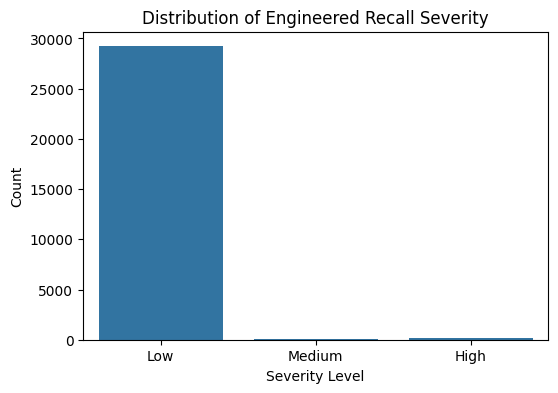

In [40]:
#Visualizing the Distribution of Engineered Recall Severity
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Recall_Severity", order=["Low", "Medium", "High"])
plt.title("Distribution of Engineered Recall Severity")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()


### Visualizing the Distribution of Engineered Recall Size Category


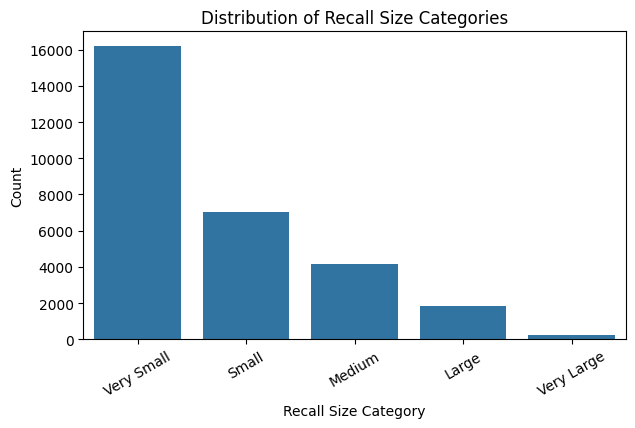

In [41]:
#Visaulizing the Distribution of Recall Size Category
order_sizes = ["Very Small", "Small", "Medium", "Large", "Very Large"]

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Recall_Size_Category", order=order_sizes)
plt.title("Distribution of Recall Size Categories")
plt.xlabel("Recall Size Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


### Visualizing the Count of Engineered Advisory Flags


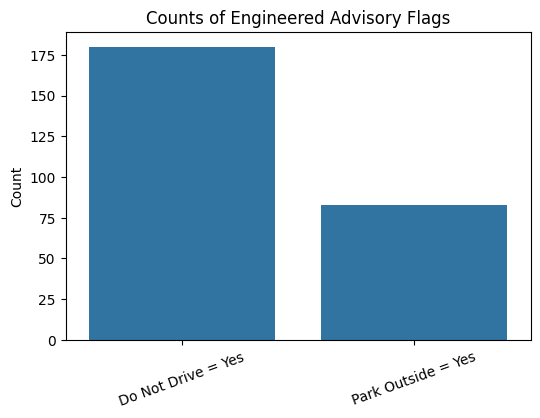

In [42]:
#Visualizing the Count of Engineered Advisory Flags
advisory_counts = {
    "Do Not Drive = Yes": df["Is_Do_Not_Drive"].sum(),
    "Park Outside = Yes": df["Is_Park_Outside"].sum()
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(advisory_counts.keys()), y=list(advisory_counts.values()))
plt.title("Counts of Engineered Advisory Flags")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()


### Visualizing the distribution of Recall Description length


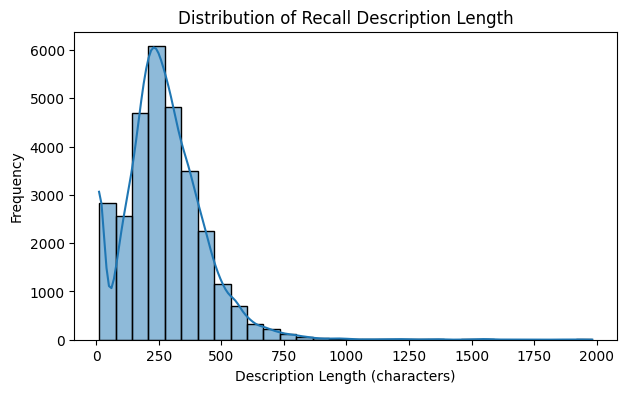

In [43]:
plt.figure(figsize=(7,4))
sns.histplot(df["Description_Length"], bins=30, kde=True)
plt.title("Distribution of Recall Description Length")
plt.xlabel("Description Length (characters)")
plt.ylabel("Frequency")
plt.show()


## Inference on Feature Engineering


**Purpose**

Feature engineering was applied to enhance interpretability and support exploratory data analysis without introducing model-driven transformations. All derived features were created using domain knowledge and descriptive logic.

**Key Feature Engineering Steps**



*   Time-Based Features:

    Date-related attributes were extracted from the report received date to enable temporal analysis of recall activity, such as yearly and monthly trends
*  Safety and Severity Features:

    Advisory indicators were transformed into binary variables and combined to create a recall severity classification. This feature reflects official safety guidance and allows recalls to be grouped by risk level.



*   Recall Size Categorisation:

    The number of potentially affected vehicles was grouped into size categories to reduce skewness and improve comparison between recalls of different scales.
*   Text Length Features:

    Subject and description length measures were created to capture the level of detail in recall communications, supporting analysis of information complexity.


**Validation**

Simple visual checks were performed to confirm that the engineered features were logically distributed and aligned with domain expectations.

Overall, the feature engineering process produced meaningful and interpretable variables that strengthen subsequent exploratory analysis while preserving the original dataset structure.



# **Exploratory Data Analysis(EDA)**



##Dataset Overview


In [44]:
#printing structure of the dataset
print("----- DATASET STRUCTURE -----")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nColumn Data Types:")
print(df.dtypes)


print("----- Duplicates in dataset -----")
print("Number of duplicate rows:", df.duplicated().sum())


----- DATASET STRUCTURE -----
Rows: 29467
Columns: 24

Column Data Types:
Report_Received_Date     datetime64[ns]
NHTSA_ID                         object
Recall_Link                      object
Manufacturer                     object
Subject                          object
Component                        object
Mfr_Campaign_Number              object
Recall_Type                      object
Potentially_Affected              int64
Recall_Description               object
Consequence_Summary              object
Corrective_Action                object
Park_Outside_Advisory            object
Do_Not_Drive_Advisory            object
Recall_Year                       int32
Recall_Month                      int32
Recall_Month_Name                object
Recall_YearMonth                 object
Is_Do_Not_Drive                   int64
Is_Park_Outside                   int64
Recall_Severity                  object
Recall_Size_Category           category
Subject_Length                    int64
Descri

##Descriptive Statistics for Numeric Columns


In [45]:
#Descriptive statistics for numeric columns

# Selecting key numeric columns that matter for this dataset
numeric_candidates = ["Potentially_Affected", "Subject_Length", "Description_Length"]
numeric_cols = [c for c in numeric_candidates if c in df.columns]

print("Numeric columns selected for descriptive statistics:", numeric_cols)

# Descriptive statistics
if numeric_cols:
    stats = df[numeric_cols].describe(percentiles=[.25, .5, .75, .9, .95]).T
    stats["missing"] = df[numeric_cols].isna().sum().values
    stats["missing_pct"] = (df[numeric_cols].isna().mean() * 100).values
    display(stats)
else:
    print("No expected numeric columns found for descriptive statistics.")


Numeric columns selected for descriptive statistics: ['Potentially_Affected', 'Subject_Length', 'Description_Length']


,count,mean,std,min,25%,50%,75%,90%,95%,max,missing,missing_pct
Potentially_Affected,29467.00,45300.35,368207.01,0.00,96.00,680.00,6379.00,52844.80,165760.10,32000000.00,0,0.00
Subject_Length,29467.00,34.18,10.93,5.00,26.00,35.00,43.00,48.00,50.00,75.00,0,0.00
Description_Length,29467.00,273.39,163.85,12.00,176.00,258.00,359.00,463.00,547.00,1982.00,0,0.00


##Descriptive Statistics for Categorical Columns


In [46]:
# Selecting key categorical columns relevant to analysis
categorical_candidates = [
    "Manufacturer",
    "Component",
    "Recall_Type",
    "Park_Outside_Advisory",
    "Do_Not_Drive_Advisory",
    "Recall_Size_Category",
    "Recall_Severity"
]

categorical_cols = [c for c in categorical_candidates if c in df.columns]

print("Categorical columns selected for descriptive statistics:")
print(categorical_cols)

# Descriptive statistics for categorical variables
if categorical_cols:
    cat_summary = []

    for col in categorical_cols:
        summary = {
            "column": col,
            "count": df[col].count(),
            "unique": df[col].nunique(),
            "most_frequent": df[col].mode().iloc[0] if not df[col].mode().empty else None,
            "most_frequent_count": df[col].value_counts().iloc[0] if not df[col].value_counts().empty else None,
            "missing": df[col].isna().sum(),
            "missing_pct": round(df[col].isna().mean() * 100, 2)
        }
        cat_summary.append(summary)

    categorical_stats = pd.DataFrame(cat_summary)
    display(categorical_stats)

else:
    print("No expected categorical columns found for descriptive statistics.")


Categorical columns selected for descriptive statistics:
['Manufacturer', 'Component', 'Recall_Type', 'Park_Outside_Advisory', 'Do_Not_Drive_Advisory', 'Recall_Size_Category', 'Recall_Severity']


,column,count,unique,most_frequent,most_frequent_count,missing,missing_pct
0,Manufacturer,29467,3058,"General Motors, LLC",1692,0,0.00
1,Component,29467,36,Not Reported,7543,0,0.00
2,Recall_Type,29467,4,Vehicle,25653,0,0.00
3,Park_Outside_Advisory,29467,2,No,29384,0,0.00
4,Do_Not_Drive_Advisory,29467,2,No,29287,0,0.00
5,Recall_Size_Category,29467,5,Very Small,16198,0,0.00
6,Recall_Severity,29467,3,Low,29205,0,0.00


##Frequency Counts for Categorical Columns

In [47]:
print("\n----- TOP MANUFACTURERS BY RECALL COUNT -----")
print(df["Manufacturer"].value_counts().head(20))

print("\n----- TOP COMPONENTS BY RECALL COUNT -----")
print(df["Component"].value_counts().head(20))

print("\n----- RECALL TYPE DISTRIBUTION -----")
print(df["Recall_Type"].value_counts())

print("\n----- SAFETY ADVISORY COUNTS -----")
print("Do Not Drive Advisory:\n", df["Do_Not_Drive_Advisory"].value_counts())
print("\nPark Outside Advisory:\n", df["Park_Outside_Advisory"].value_counts())



----- TOP MANUFACTURERS BY RECALL COUNT -----
Manufacturer
General Motors, LLC                         1692
Ford Motor Company                          1654
Chrysler (FCA US, LLC)                      1481
Forest River, Inc.                           612
Volkswagen Group of America, Inc.            579
BMW of North America, LLC                    573
Daimler Trucks North America, LLC            529
Mercedes-Benz USA, LLC                       490
Honda (American Honda Motor Co.)             457
Nissan North America, Inc.                   434
Mack Trucks, Inc.                            422
PACCAR Incorporated                          417
Blue Bird Body Company                       401
International Motors, LLC                    392
FREIGHTLINER LLC                             348
Toyota Motor Engineering & Manufacturing     321
INTERNATIONAL TRUCK & ENGINE CORPORATION     308
Jayco, Inc.                                  301
Hyundai Motor America                        281
Volvo Tru

## Inference: Initial Exploratory Data Analysis



*   The dataset contains 29,585 records across 24 variables with no duplicate entries, indicating good data integrity.

*   The Potentially_Affected variable shows strong right skewness, where most recalls affect few vehicles, while a small number impact millions.



*   LRecall activity is concentrated among a small number of major manufacturers, and several component entries are reported as “Not Reported”.


*   Vehicle-related recalls dominate the dataset, while high-risk safety advisories are relatively uncommon.

*   Overall, the dataset is well-structured and suitable for deeper exploratory analysis using engineered features.



## **Temporal Trend Analysis**

## Recall Over Time (Yearly)



In [48]:
df["Recall_Year"].describe()

df["Recall_Year"].value_counts().sort_index().head(10)


,count
Recall_Year,
1966,58
1967,143
1968,137
1969,187
1970,162
1971,253
1972,332
1973,277
1974,292


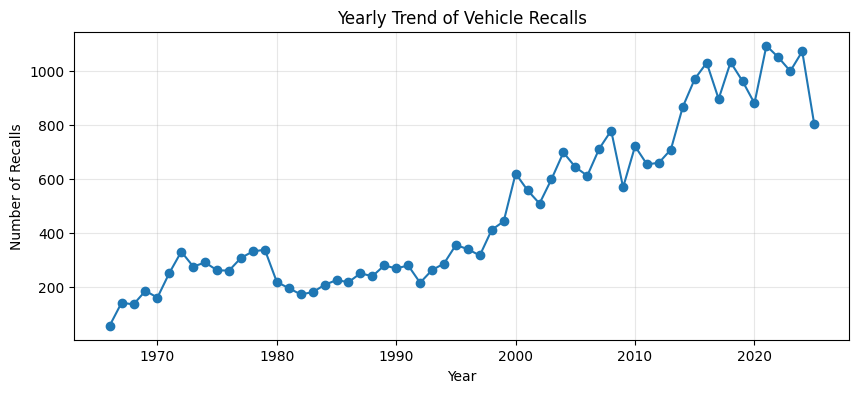

In [49]:
# Yearly recall trend
if "Recall_Year" in df.columns:
    yearly_counts = df["Recall_Year"].value_counts().sort_index()

    plt.figure(figsize=(10,4))
    yearly_counts.plot(kind="line", marker="o")
    plt.title("Yearly Trend of Vehicle Recalls")
    plt.xlabel("Year")
    plt.ylabel("Number of Recalls")
    plt.grid(alpha=0.3)
    plt.show()


## Monthly Recall Seasonality




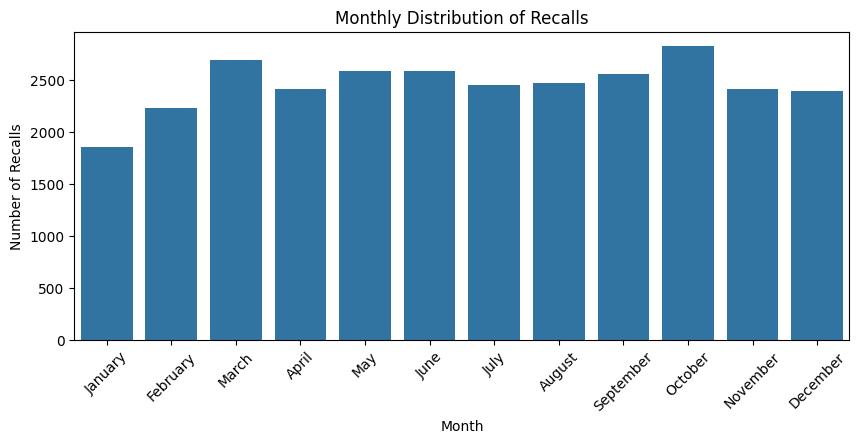

In [50]:
# Monthly seasonality (aggregated across years)
if "Recall_Month_Name" in df.columns:
    month_order = [
        "January","February","March","April","May","June",
        "July","August","September","October","November","December"
    ]
#Counting recalls per month across all years
    monthly_counts = (
        df["Recall_Month_Name"]
        .value_counts()
        .reindex(month_order) #it ensures months appear in correct calender order
    )
#Plotting it
    plt.figure(figsize=(10,4))
    sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
    plt.title("Monthly Distribution of Recalls")
    plt.xlabel("Month")
    plt.ylabel("Number of Recalls")
    plt.xticks(rotation=45)
    plt.show()


## Temporal Trends (Monthly Distribution)



*   Recalls occur consistently throughout the year, with slightly higher activity in March, May, and October.
*   This suggests no extreme seasonality, but mild peaks that may align with production cycles or regulatory reviews.


## Recall Severity Trends Over Time (Stacked Area)




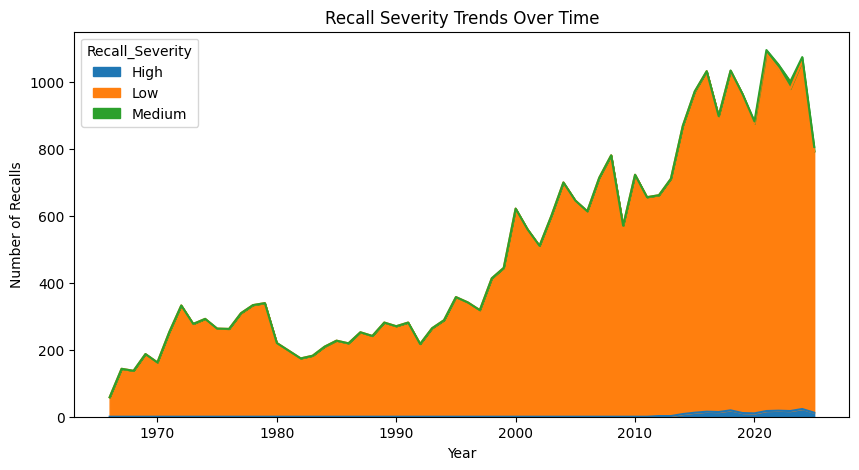

In [51]:
# Aggregate recall counts by year and severity level
year_severity = pd.crosstab(
    df["Recall_Year"],
    df["Recall_Severity"]
)
# Stacked area plot highlights changes in severity composition over time
year_severity.plot(kind="area", stacked=True, figsize=(10,5))
plt.title("Recall Severity Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Recalls")
plt.show()


## Inference: Recall Severity Trends Over Time

Recall counts increase over time, particularly after 2000.

Low-severity recalls dominate consistently across all years.

High-severity recalls remain rare, indicating limited extreme-risk events.

## **Manufacturer Analysis**

## Top 10 Manafacturers by Recall Count



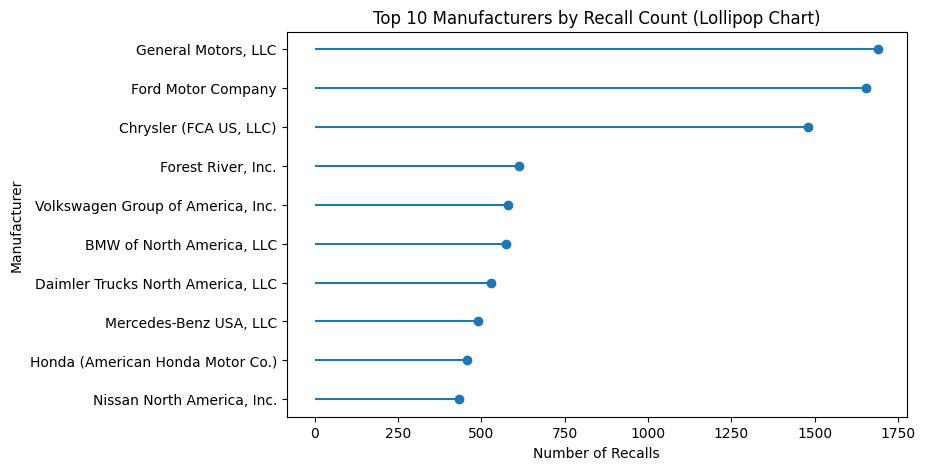

In [52]:
#Identifying Manufacturer with the highest number of recalls
#top_manufacturers = df["Manufacturer"].value_counts().head(10)
#Plotting it
#plt.figure(figsize=(10,4))
#sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index)
#plt.title("Top 10 Manufacturers by Number of Recalls")
#plt.xlabel("Recall Count")
#plt.ylabel("Manufacturer")
#plt.show()

# Lollipop chart for Top 10 Manufacturers
top_mfr = df["Manufacturer"].value_counts().head(10).sort_values()

plt.figure(figsize=(8,5))
plt.hlines(
    y=top_mfr.index,
    xmin=0,
    xmax=top_mfr.values
)
plt.plot(
    top_mfr.values,
    top_mfr.index,
    "o"
)
plt.title("Top 10 Manufacturers by Recall Count (Lollipop Chart)")
plt.xlabel("Number of Recalls")
plt.ylabel("Manufacturer")
plt.show()





## Top Manufacturers Analysis



*   A small number of manufacturers (e.g., General Motors, Ford, Chrysler) account for a disproportionately high number of recalls.
*   This reflects their larger market presence, rather than poorer quality alone.



## **Distribution Analysis (Univariate)**

## Distribution Analysis of Numeric Column (Histogram)

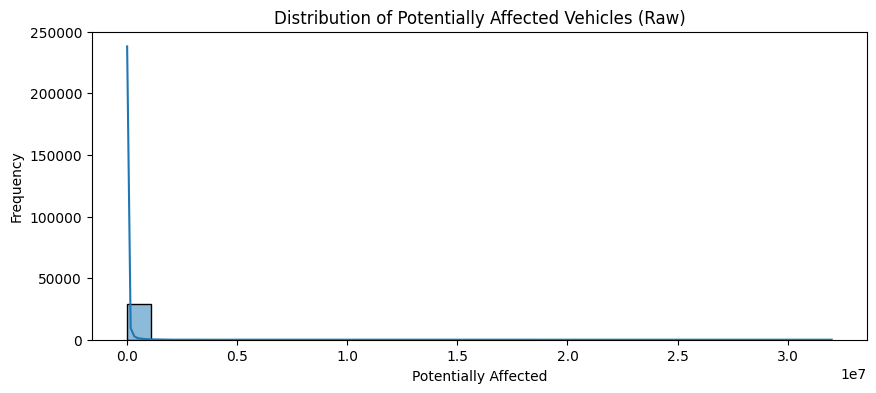

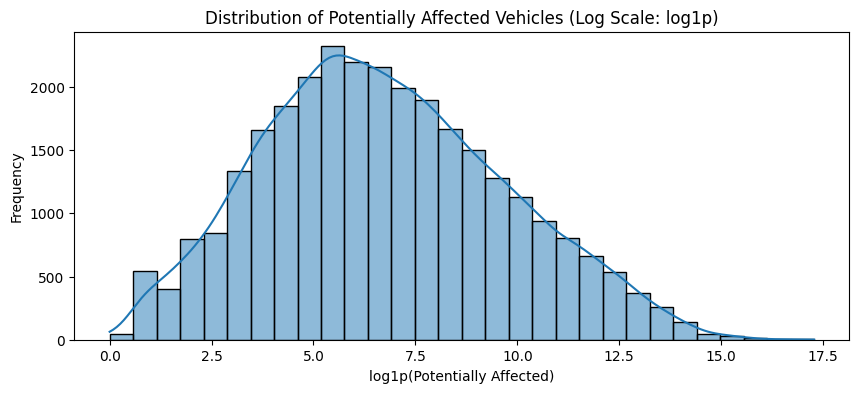

In [53]:
if "Potentially_Affected" in df.columns:
    # Raw distribution (often skewed)
    plt.figure(figsize=(10,4))
    sns.histplot(df["Potentially_Affected"].dropna(), bins=30, kde=True)
    plt.title("Distribution of Potentially Affected Vehicles (Raw)")
    plt.xlabel("Potentially Affected")
    plt.ylabel("Frequency")
    plt.show()

    # Log distribution for better readability (handles extreme values)
    plt.figure(figsize=(10,4))
    sns.histplot(np.log1p(df["Potentially_Affected"].dropna()), bins=30, kde=True)
    plt.title("Distribution of Potentially Affected Vehicles (Log Scale: log1p)")
    plt.xlabel("log1p(Potentially Affected)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'Potentially_Affected' not found.")


### Inference: Distribution of Potentially Affected Vehicles (Raw)



*   The raw distribution is extremely right-skewed, with most recalls affecting a small number of vehicles and a few recalls impacting very large populations.
*   Extreme values dominate the scale, making detailed interpretation difficult in raw form.


### Inference: Distribution of Potentially Affected Vehicles (Log Scale)

*   The log-scaled distribution reveals a clearer spread of recall sizes and reduces the visual dominance of extreme values.
*   This confirms that recall sizes vary across multiple orders of magnitude rather than clustering around a single range.


## Text Length Distribution (Histogram)

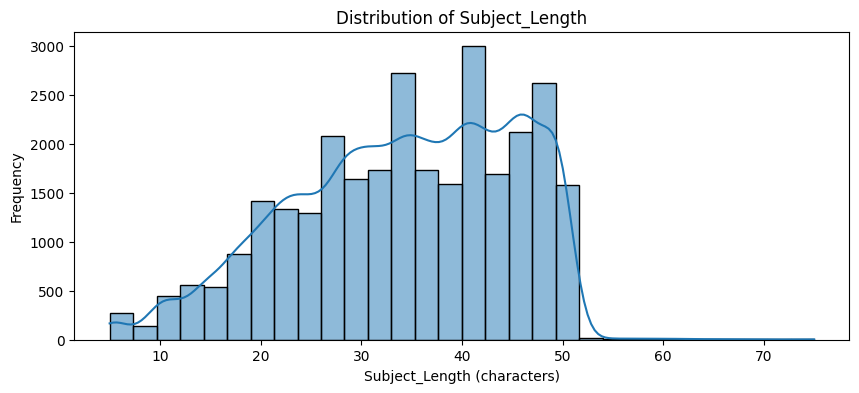

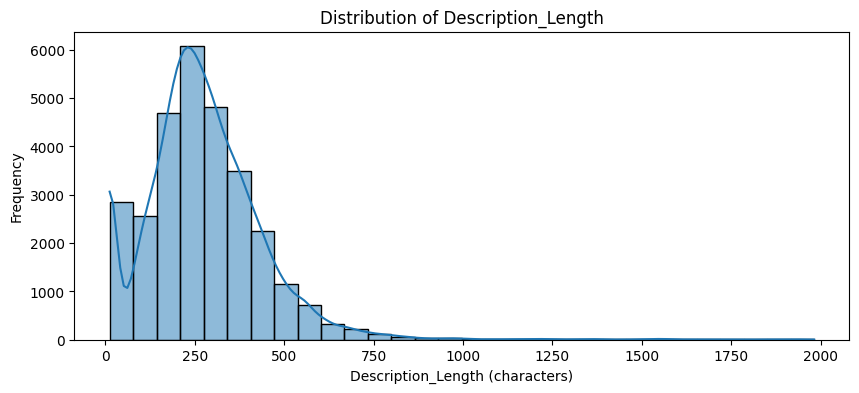

In [54]:
#Histogram of both Subject length and descriptive length
for col in ["Subject_Length", "Description_Length"]:
    if col in df.columns:
        plt.figure(figsize=(10,4))
        sns.histplot(df[col].dropna(), bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(f"{col} (characters)")
        plt.ylabel("Frequency")
        plt.show()


### Inference: Distribution of Subject Length



*   Subject lengths are relatively concentrated within a narrow range, indicating consistent and concise recall titles.
*   Very long or very short subjects are uncommon.

### Inference: Distribution of Description Length



*   Description lengths show greater variability, with a noticeable right tail.
*   This suggests that while most recalls are described succinctly, some require significantly more detailed explanations.


## Outlier Visaulisation (BoxPlot)

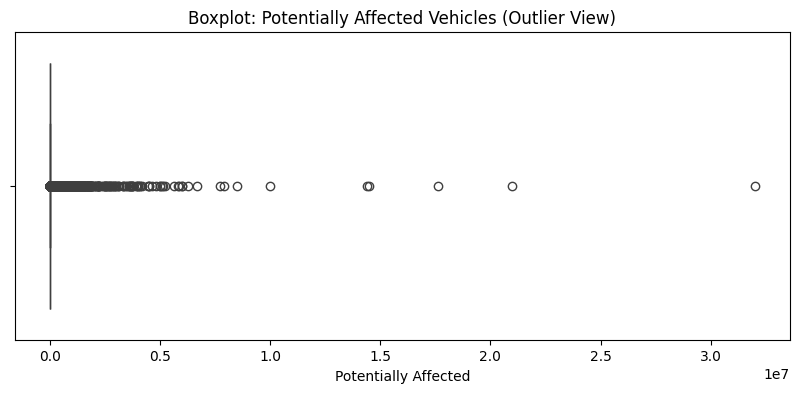

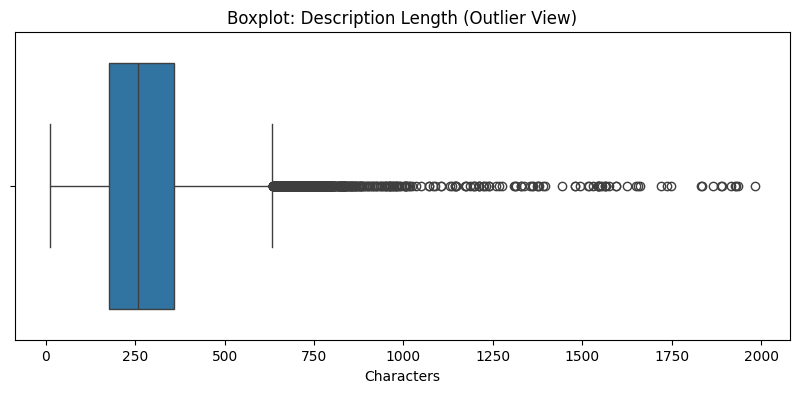

In [55]:
# Boxplots help highlight extreme values without removing them
#Box Plot for Potentially Affected Vehicles
if "Potentially_Affected" in df.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df["Potentially_Affected"].dropna())
    plt.title("Boxplot: Potentially Affected Vehicles (Outlier View)")
    plt.xlabel("Potentially Affected")
    plt.show()
#Box Plot for Description length
if "Description_Length" in df.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df["Description_Length"].dropna())
    plt.title("Boxplot: Description Length (Outlier View)")
    plt.xlabel("Characters")
    plt.show()


### Inference: Boxplot of Potentially Affected Vehicles



*   A large number of high-value outliers are present, representing large-scale recalls rather than data errors.
*   These extreme values reflect real-world safety events and should be retained for analysis.

### Inference: Boxplot of Description Length



*   Several high-end outliers indicate unusually detailed recall descriptions.
*   These cases likely correspond to complex recalls and do not require removal.


## **Categorical Analysis (Univariate)**

## Recall Type (Countplot)


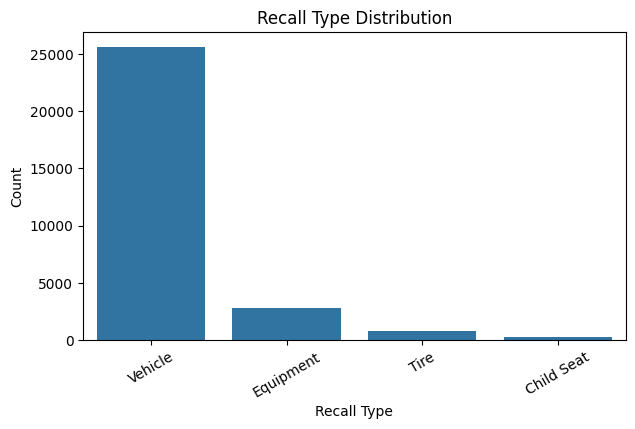

In [56]:
#Plotting the recall type Category using countplot
if "Recall_Type" in df.columns:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x="Recall_Type", order=df["Recall_Type"].value_counts().index)
    plt.title("Recall Type Distribution")
    plt.xlabel("Recall Type")
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.show()



## Inference: Recall Type Distribution

Vehicle recalls account for the majority of cases, with equipment, tire, and child seat recalls occurring far less frequently.

This highlights a strong imbalance in recall types.

## Recall Size Category (Countplot)


In [ ]:
#plotting the recall size category
if "Recall_Size_Category" in df.columns:
    order_sizes = ["Very Small","Small","Medium","Large","Very Large"]

    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x="Recall_Size_Category", order=order_sizes)
    plt.title("Recall Size Category Distribution")
    plt.xlabel("Recall Size")
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.show()


## Inference: Recall Size Category Distribution

Most recalls fall into the Very Small and Small categories.

Large and very large recalls are relatively rare but represent high-impact safety events.

## Cumulative Distribution of Potentially Affected


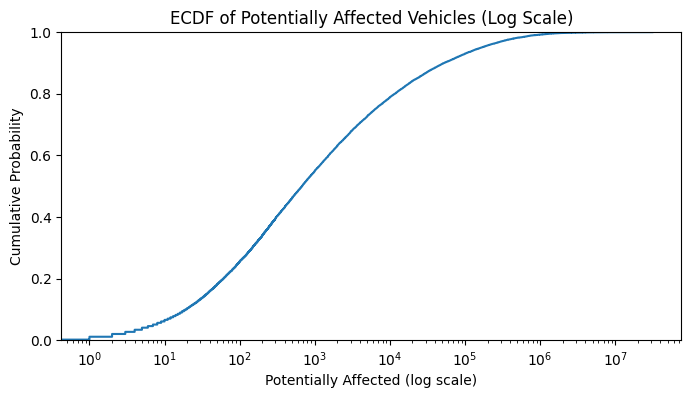

In [57]:
# ECDF to show the cumulative proportion of recalls by affected vehicle count
plt.figure(figsize=(8,4))
sns.ecdfplot(df["Potentially_Affected"].dropna())
plt.xscale("log") # Log scale is used to handle extreme right-skewness in recall sizes
plt.title("ECDF of Potentially Affected Vehicles (Log Scale)")
plt.xlabel("Potentially Affected (log scale)")
plt.ylabel("Cumulative Probability")
plt.show()


## Inference: ECDF of Potentially Affected Vehicles

Most recalls affect relatively few vehicles.

The distribution is heavily right-skewed, with few very large recalls.

Confirms the need for log scaling and size categorisation.

## Pareto-style Cumulative Plot – Top Components


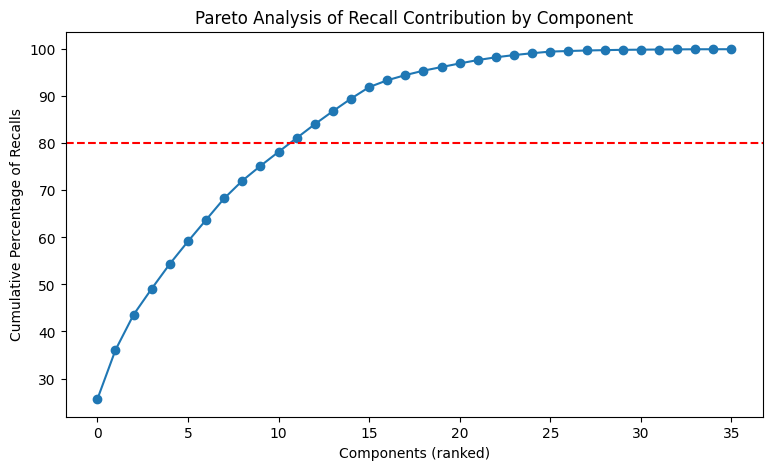

In [58]:
component_counts = df["Component"].value_counts()
cum_pct = component_counts.cumsum() / component_counts.sum() * 100

plt.figure(figsize=(9,5))
plt.plot(cum_pct.values, marker="o")
plt.axhline(80, linestyle="--", color="red")
plt.title("Pareto Analysis of Recall Contribution by Component")
plt.xlabel("Components (ranked)")
plt.ylabel("Cumulative Percentage of Recalls")
plt.show()


## **Bivariate Analysis**

# Numerical ↔ Categorical



## Text Pattern VS Severity(Boxplot)






### Subject Length by Severity

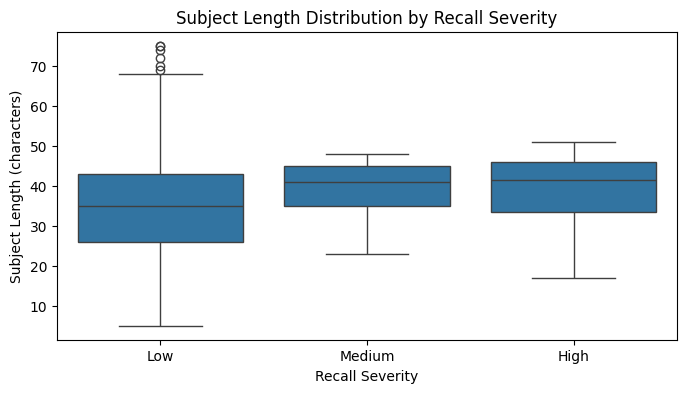

In [59]:
#Comparing subject length accros severity levels
plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x="Recall_Severity",
    y="Subject_Length",
    order=["Low","Medium","High"]
)
plt.title("Subject Length Distribution by Recall Severity")
plt.xlabel("Recall Severity")
plt.ylabel("Subject Length (characters)")
plt.show()


## Inference: Subject Length vs Recall Severity



*   Subject length shows a gradual increase with recall severity.
*   Low severity recalls typically have shorter and more concise subject lines, focusing on brief issue identification.


*   Medium and High severity recalls tend to use longer subject lines, likely to clearly communicate urgency and capture immediate attention.


### Descriptive Length by Severity

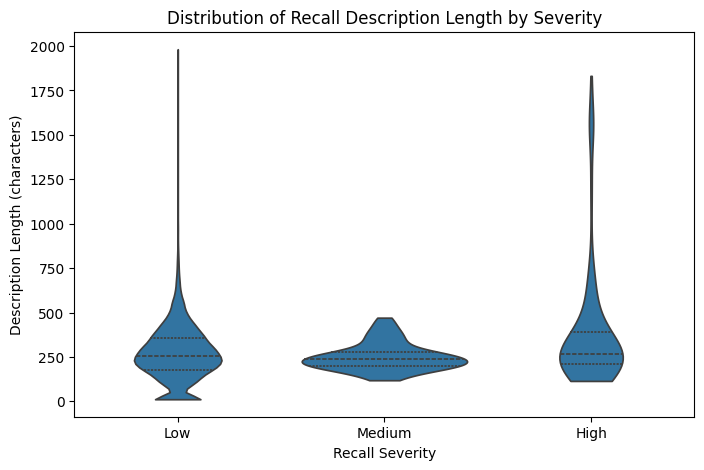

In [60]:
#Comparing Descriptive length accros severity levels
#plt.figure(figsize=(8,4))
#sns.boxplot(
 #   data=df,
  #  x="Recall_Severity",
   # y="Description_Length",
    #order=["Low","Medium","High"]
#)
#plt.title("Description Length Distribution by Recall Severity")
#plt.xlabel("Recall Severity")
#plt.ylabel("Description Length (characters)")
#plt.show()
plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="Recall_Severity",
    y="Description_Length",
    inner="quartile",
    cut=0
)
plt.title("Distribution of Recall Description Length by Severity")
plt.xlabel("Recall Severity")
plt.ylabel("Description Length (characters)")
plt.show()








## Inference: Description Length vs Recall Severity



*   Description length varies more widely than subject length and increases noticeably for higher severity recalls.
*   High severity recalls often contain longer and more detailed descriptions, explaining risks, consequences, and corrective actions.


*   This indicates that greater recall severity requires more comprehensive communication to ensure consumer understanding and safety.

## Potentially Affected VS Recall Size_Category(Boxplot)






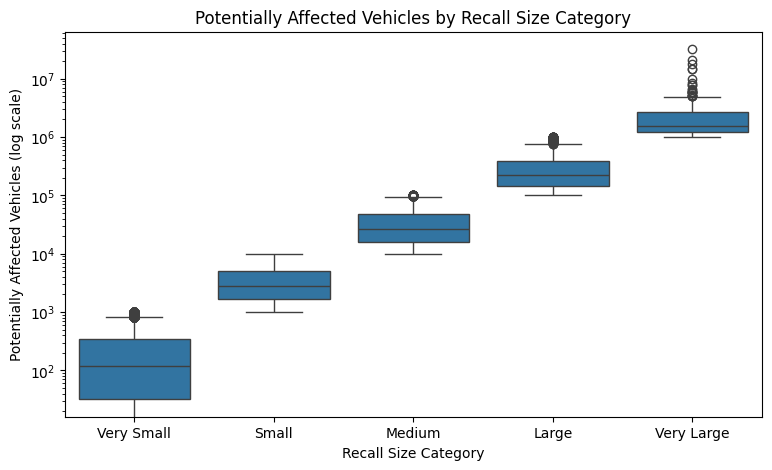

In [61]:
# Box plot to compare number of affected vehicles across recall size categories
plt.figure(figsize=(9,5))

sns.boxplot(
    data=df,
    x="Recall_Size_Category",
    y="Potentially_Affected",
    order=["Very Small", "Small", "Medium", "Large", "Very Large"]
)

# Log scale improves readability due to extreme skew in affected vehicles
plt.yscale("log")

plt.title("Potentially Affected Vehicles by Recall Size Category")
plt.xlabel("Recall Size Category")
plt.ylabel("Potentially Affected Vehicles (log scale)")
plt.show()



## Inference from Potentially Affected vs Recall Size Category


*   The distribution shows a clear monotonic increase from Very Small to Very Large recall categories.

*   Each size category is well separated, validating the logic used to create Recall_Size_Category.



*   The log scale highlights extreme values while preserving relative differences.
*  This confirms that recall size categorization is statistically meaningful and consistent.


## Potentially Affected VS Recall Severity(Boxplot)






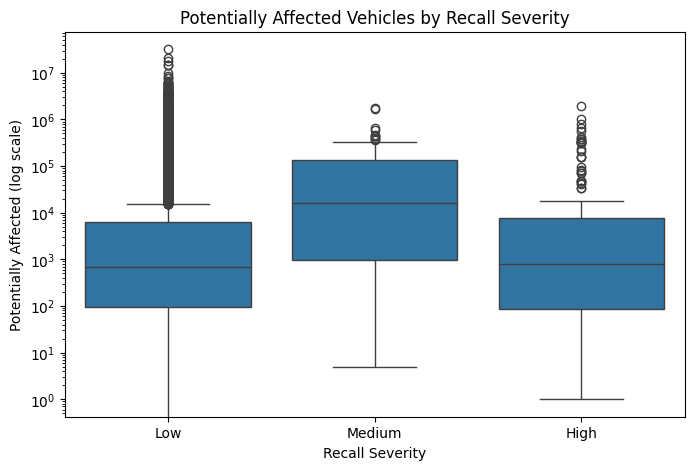

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="Recall_Severity",
    y="Potentially_Affected",
    order=["Low", "Medium", "High"]
)
plt.yscale("log")  # handles extreme skew
plt.title("Potentially Affected Vehicles by Recall Severity")
plt.xlabel("Recall Severity")
plt.ylabel("Potentially Affected (log scale)")
plt.show()


## Inference from Potentially Affected vs Recall Size Category




*   Medium severity recalls tend to have a higher median number of affected vehicles compared to Low and High.


*   High severity recalls are not necessarily large in size, indicating severity is driven by risk level, not volume.
*   There is significant overlap, suggesting severity and size are related but not equivalent concepts.


## Log-Scaled Scatter Plot with Trend (Relationship Analysis)






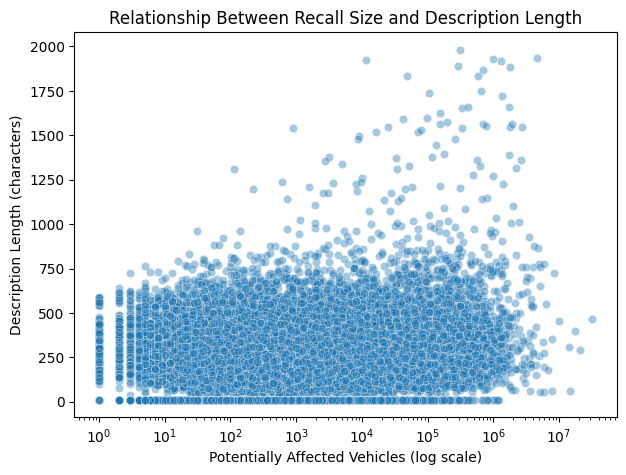

In [63]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Potentially_Affected",
    y="Description_Length",
    alpha=0.4
)
plt.xscale("log")
plt.title("Relationship Between Recall Size and Description Length")
plt.xlabel("Potentially Affected Vehicles (log scale)")
plt.ylabel("Description Length (characters)")
plt.show()


## Potentially Affected VS Park Outside Advisory(Boxplot)









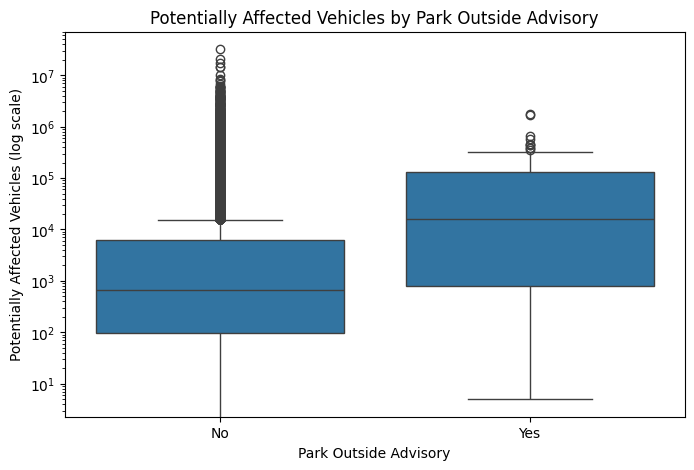

In [64]:
# Box plot to compare number of affected vehicles
# between recalls with and without a Park Outside advisory
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="Park_Outside_Advisory",
    y="Potentially_Affected"
)

# Log scale improves readability due to extreme skew
plt.yscale("log")

plt.title("Potentially Affected Vehicles by Park Outside Advisory")
plt.xlabel("Park Outside Advisory")
plt.ylabel("Potentially Affected Vehicles (log scale)")
plt.show()


## Inference : Park Outside vs Potentially Affected



*   Recalls with Park Outside = Yes generally affect larger numbers of vehicles.

*   This advisory is more common in recalls with wider impact, likely due to safety risks (e.g., fire hazards).
*  Supports the interpretation that park-outside advisories signal higher operational risk.



## Potentially Affected VS Do not Drive Advisory(Boxplot)









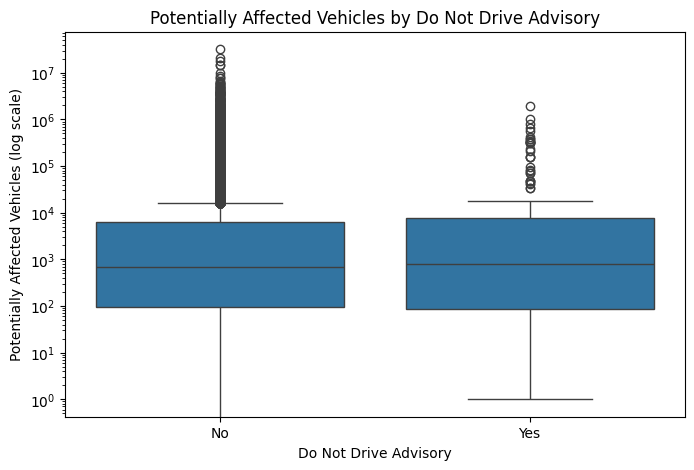

In [65]:
# Box plot to compare number of affected vehicles
# between recalls with and without a Do Not Drive advisory
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="Do_Not_Drive_Advisory",
    y="Potentially_Affected"
)

plt.yscale("log")

plt.title("Potentially Affected Vehicles by Do Not Drive Advisory")
plt.xlabel("Do Not Drive Advisory")
plt.ylabel("Potentially Affected Vehicles (log scale)")
plt.show()


## Inference from Do Not Drive Advisory vs Potentially Affected

Both Yes and No categories show wide variability in affected vehicles.

Do Not Drive = Yes recalls are not consistently larger in size, reinforcing that this advisory reflects severity, not scale.

Confirms the need to treat advisories and recall size as separate analytical dimensions.

# Categorical ↔ Categorical



## Severity Vs Recall Size  (Categorical)



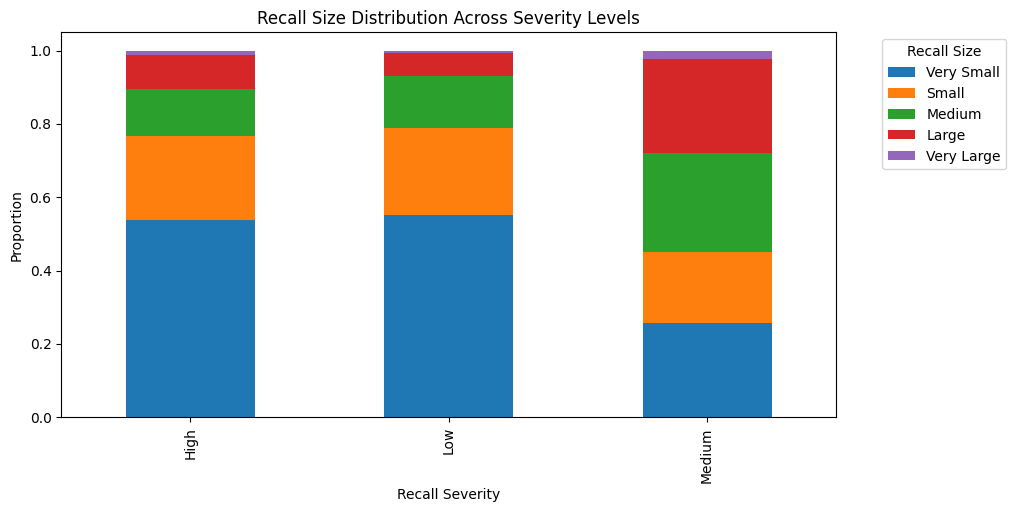

In [66]:
#Creating cross tab to compare recall size propotions
severity_size_ct = pd.crosstab(
    df["Recall_Severity"],
    df["Recall_Size_Category"],
    normalize="index" #Normalization allows comparison severity levels
)

severity_size_ct.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5)
)

plt.title("Recall Size Distribution Across Severity Levels")
plt.xlabel("Recall Severity")
plt.ylabel("Proportion")
plt.legend(title="Recall Size", bbox_to_anchor=(1.05,1))
plt.show()


## Recall Size vs Severity



*   LHigh severity recalls are not necessarily large-scale; many involve small or medium recall sizes.
*   Medium severity recalls show a higher proportion of large and very large recall sizes, suggesting broader impact when issues escalate beyond minor faults.


## Recal Severity vs Manufacturer (Top 10)



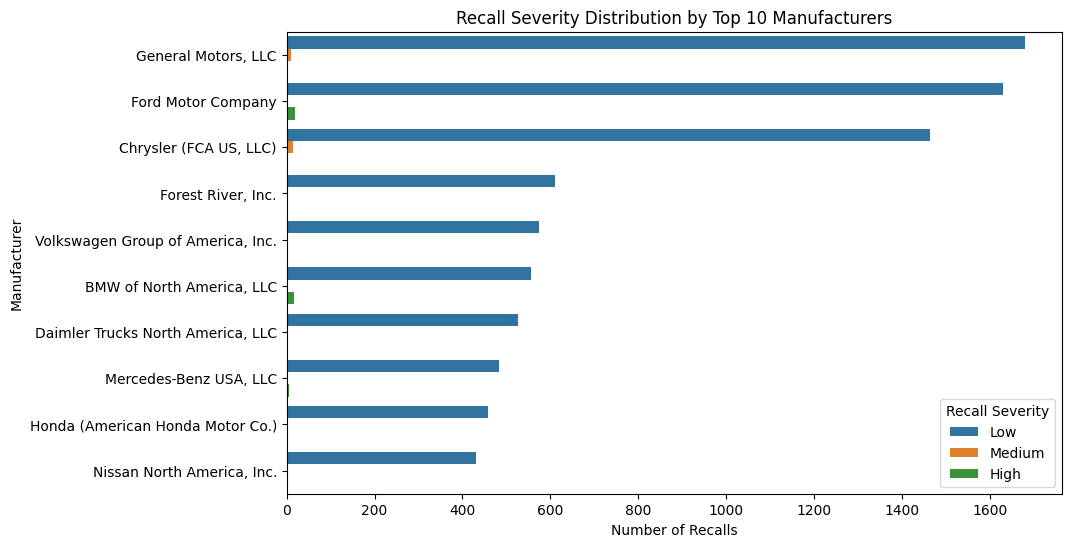

In [67]:
# Identify the top 10 manufacturers based on total number of recalls
top_manufacturers = df["Manufacturer"].value_counts().head(10).index

# Filter the dataset to include only the top 10 manufacturers
df_top_mfr = df[df["Manufacturer"].isin(top_manufacturers)]

# Plot recall severity distribution for the top manufacturers
plt.figure(figsize=(10,6))

sns.countplot(
    data=df_top_mfr,
    y="Manufacturer",
    hue="Recall_Severity",
    order=top_manufacturers,
    hue_order=["Low", "Medium", "High"]
)

plt.title("Recall Severity Distribution by Top 10 Manufacturers")
plt.xlabel("Number of Recalls")
plt.ylabel("Manufacturer")
plt.legend(title="Recall Severity")
plt.show()


## Recall Severity by Manufacturer



*   Across all top manufacturers, Low severity recalls dominate.
*   Medium and High severity recalls are rare, indicating that most recalls are precautionary rather than critical failures.

## Scatter Plot (Log Scale): Subject Length vs Description Length



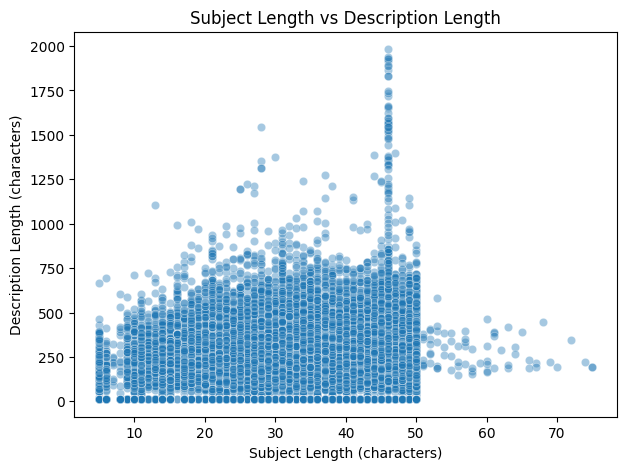

In [68]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="Subject_Length",
    y="Description_Length",
    alpha=0.4
)
plt.title("Subject Length vs Description Length")
plt.xlabel("Subject Length (characters)")
plt.ylabel("Description Length (characters)")
#plt.yscale("log")
plt.show()




## MManufacturer × Severity Heatmap (Top 10 Only)

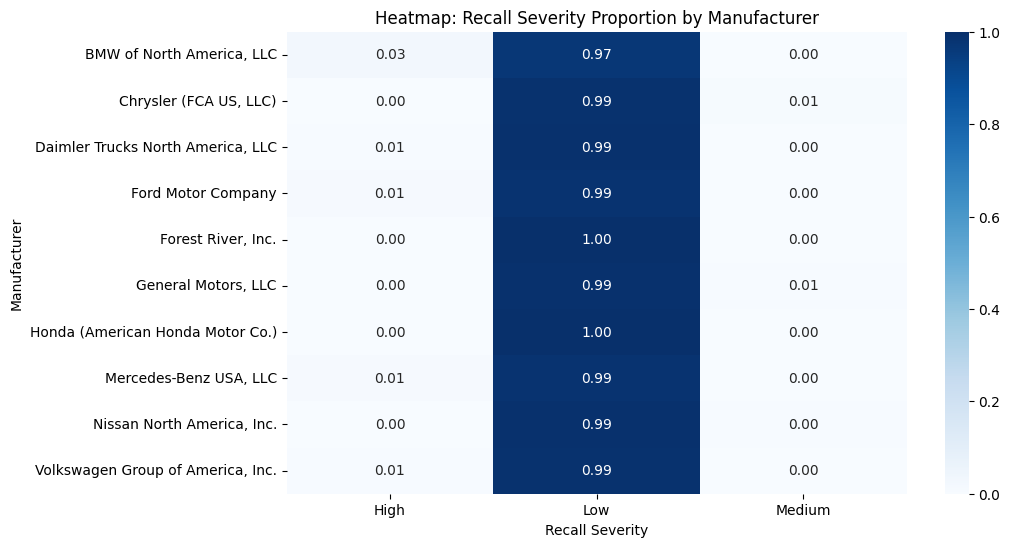

In [69]:
# Creating a proportional heatmap to show severity distribution
heatmap_data = pd.crosstab(
    df_top_mfr["Manufacturer"],
    df_top_mfr["Recall_Severity"],
    normalize="index"
)

plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)
plt.title("Heatmap: Recall Severity Proportion by Manufacturer")
plt.xlabel("Recall Severity")
plt.ylabel("Manufacturer")
plt.show()


## Manufacturer × Severity Heatmap



*   The heatmap confirms that Low severity dominates across all major manufacturers.
*  High severity recalls form only a very small proportion, reinforcing overall recall risk control in the industry.

## Component × Severity Heatmap (Top 10 Only)

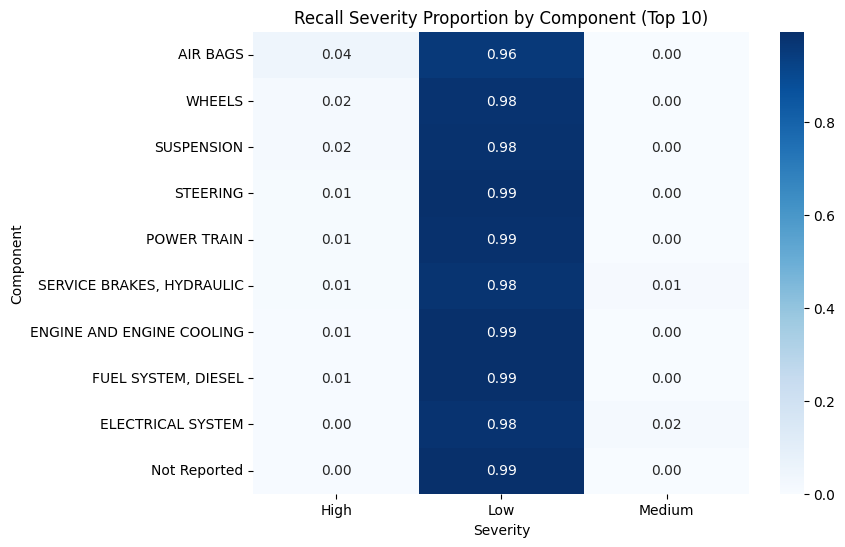

In [70]:
# Creating a proportional cross-tab between component and recall severity
component_severity = pd.crosstab(
    df["Component"],
    df["Recall_Severity"],
    normalize="index" # Normalization allows comparison of severity composition across components
)

# Selecting top 10 components with the highest proportion of high severity recalls
top_components = component_severity.sort_values("High", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.heatmap(top_components, annot=True, fmt=".2f", cmap="Blues")
plt.title("Recall Severity Proportion by Component (Top 10)")
plt.ylabel("Component")
plt.xlabel("Severity")
plt.show()



##Inference: Recall Severity by Component

Low severity dominates across all major components.

High-severity recalls are uncommon even in critical systems.

Severity patterns are broadly consistent across components.

# **Exporting Clean Dataset for Tableau**

In [ ]:
#df.to_csv("vehicle_recalls_cleaned.csv", index=False)
